    - creates fig 2 (+ variants of it ...)
    - creates suppl. fig. with global prcp. evolution 

In [82]:
# updated script version for flattening gfdl-esm2m overshoot stabilisation scenarios from university of Bern 
from oggm import utils
import json
import oggm
import sys
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
# get the correct colors for the different scenarios
from analysis_func import color_scenario, label_scenario,color_scenario_poster

palette = sns.color_palette(color_scenario.values())

# get the dataset where coordinates of glaciers are stored
frgi = utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/rgi/rgi62_stats.h5')
#frgi = '/home/users/lschuster/glacierMIP/rgi62_stats.h5'
odf = pd.read_hdf(frgi, index_col=0)
odf['coords'] = [(lon,lat) for lon,lat in zip(odf['CenLon'],odf['CenLat'])]

In [83]:
pd_clim_all= pd.read_csv('../annual_glob_rgi_reg_basin_temp_precip_timeseries_oversh_stab.csv', 
                         index_col=['Unnamed: 0'])
color_scenario_all_oversh = {'stab_T12': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 'stab_T15': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 'stab_T30': (0.8, 0.47058823529411764, 0.7372549019607844),
                             'oversh_T20OS15': (0.33725490196078434,
  0.7058823529411765,
  0.9137254901960784),
 'oversh_T25OS15': (0.8705882352941177,
  0.5607843137254902,
  0.0196078431372549),
 'oversh_T30OS15': (0.8352941176470589, 0.3686274509803922, 0.0)}


df_scenario = xr.open_dataset(f'common_running_sum_all_rgi_reg_oversh_stab_2000_2500_bc_1980_2019.nc')
bc = 'bc_1980_2019' # 'bc_2000_2019' #x #


In [85]:
df_scenario.volume

<xarray.DataArray 'volume' (bias_correction: 1, rgi_reg: 19, scenario: 8,
                            gcm: 1, time: 500)>
array([[[[[1.967844e+13, ..., 1.078938e+13]],

         ...,

         [[1.967851e+13, ..., 7.336321e+12]]],


        ...,


        [[[4.542493e+13, ..., 2.781404e+13]],

         ...,

         [[4.543583e+13, ..., 1.333679e+13]]]]], dtype=float32)
Coordinates:
  * time             (time) float64 2e+03 2.001e+03 ... 2.498e+03 2.499e+03
    hydro_year       (time) int64 2000 2001 2002 2003 ... 2496 2497 2498 2499
    hydro_month      (rgi_reg, time) int64 4 4 4 4 4 4 4 ... 10 10 10 10 10 10
    calendar_year    (time) int64 2000 2001 2002 2003 ... 2496 2497 2498 2499
    calendar_month   (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
  * gcm              (gcm) object 'GFDL-ESM2M'
  * scenario         (scenario) object 'oversh_T20OS15' ... 'stab_T30'
  * bias_correction  (bias_correction) object 'bc_1980_2019'
    OGGM_version     <U22 'OGGM_v161_gdirs_2023.3'
  * rgi_reg          (rgi_reg) object '01' '02' '03' '04' ... '17' '18' '19'

In [3]:
num_dict = {0:'a', 1:'b', 2:'c', 3:'d', 4: 'e',
            5:'f', 6:'g', 7:'h', 8:'i', 9:'j',
            10:'k', 11:'l', 12:'m'} 

**two-column approach --> old**

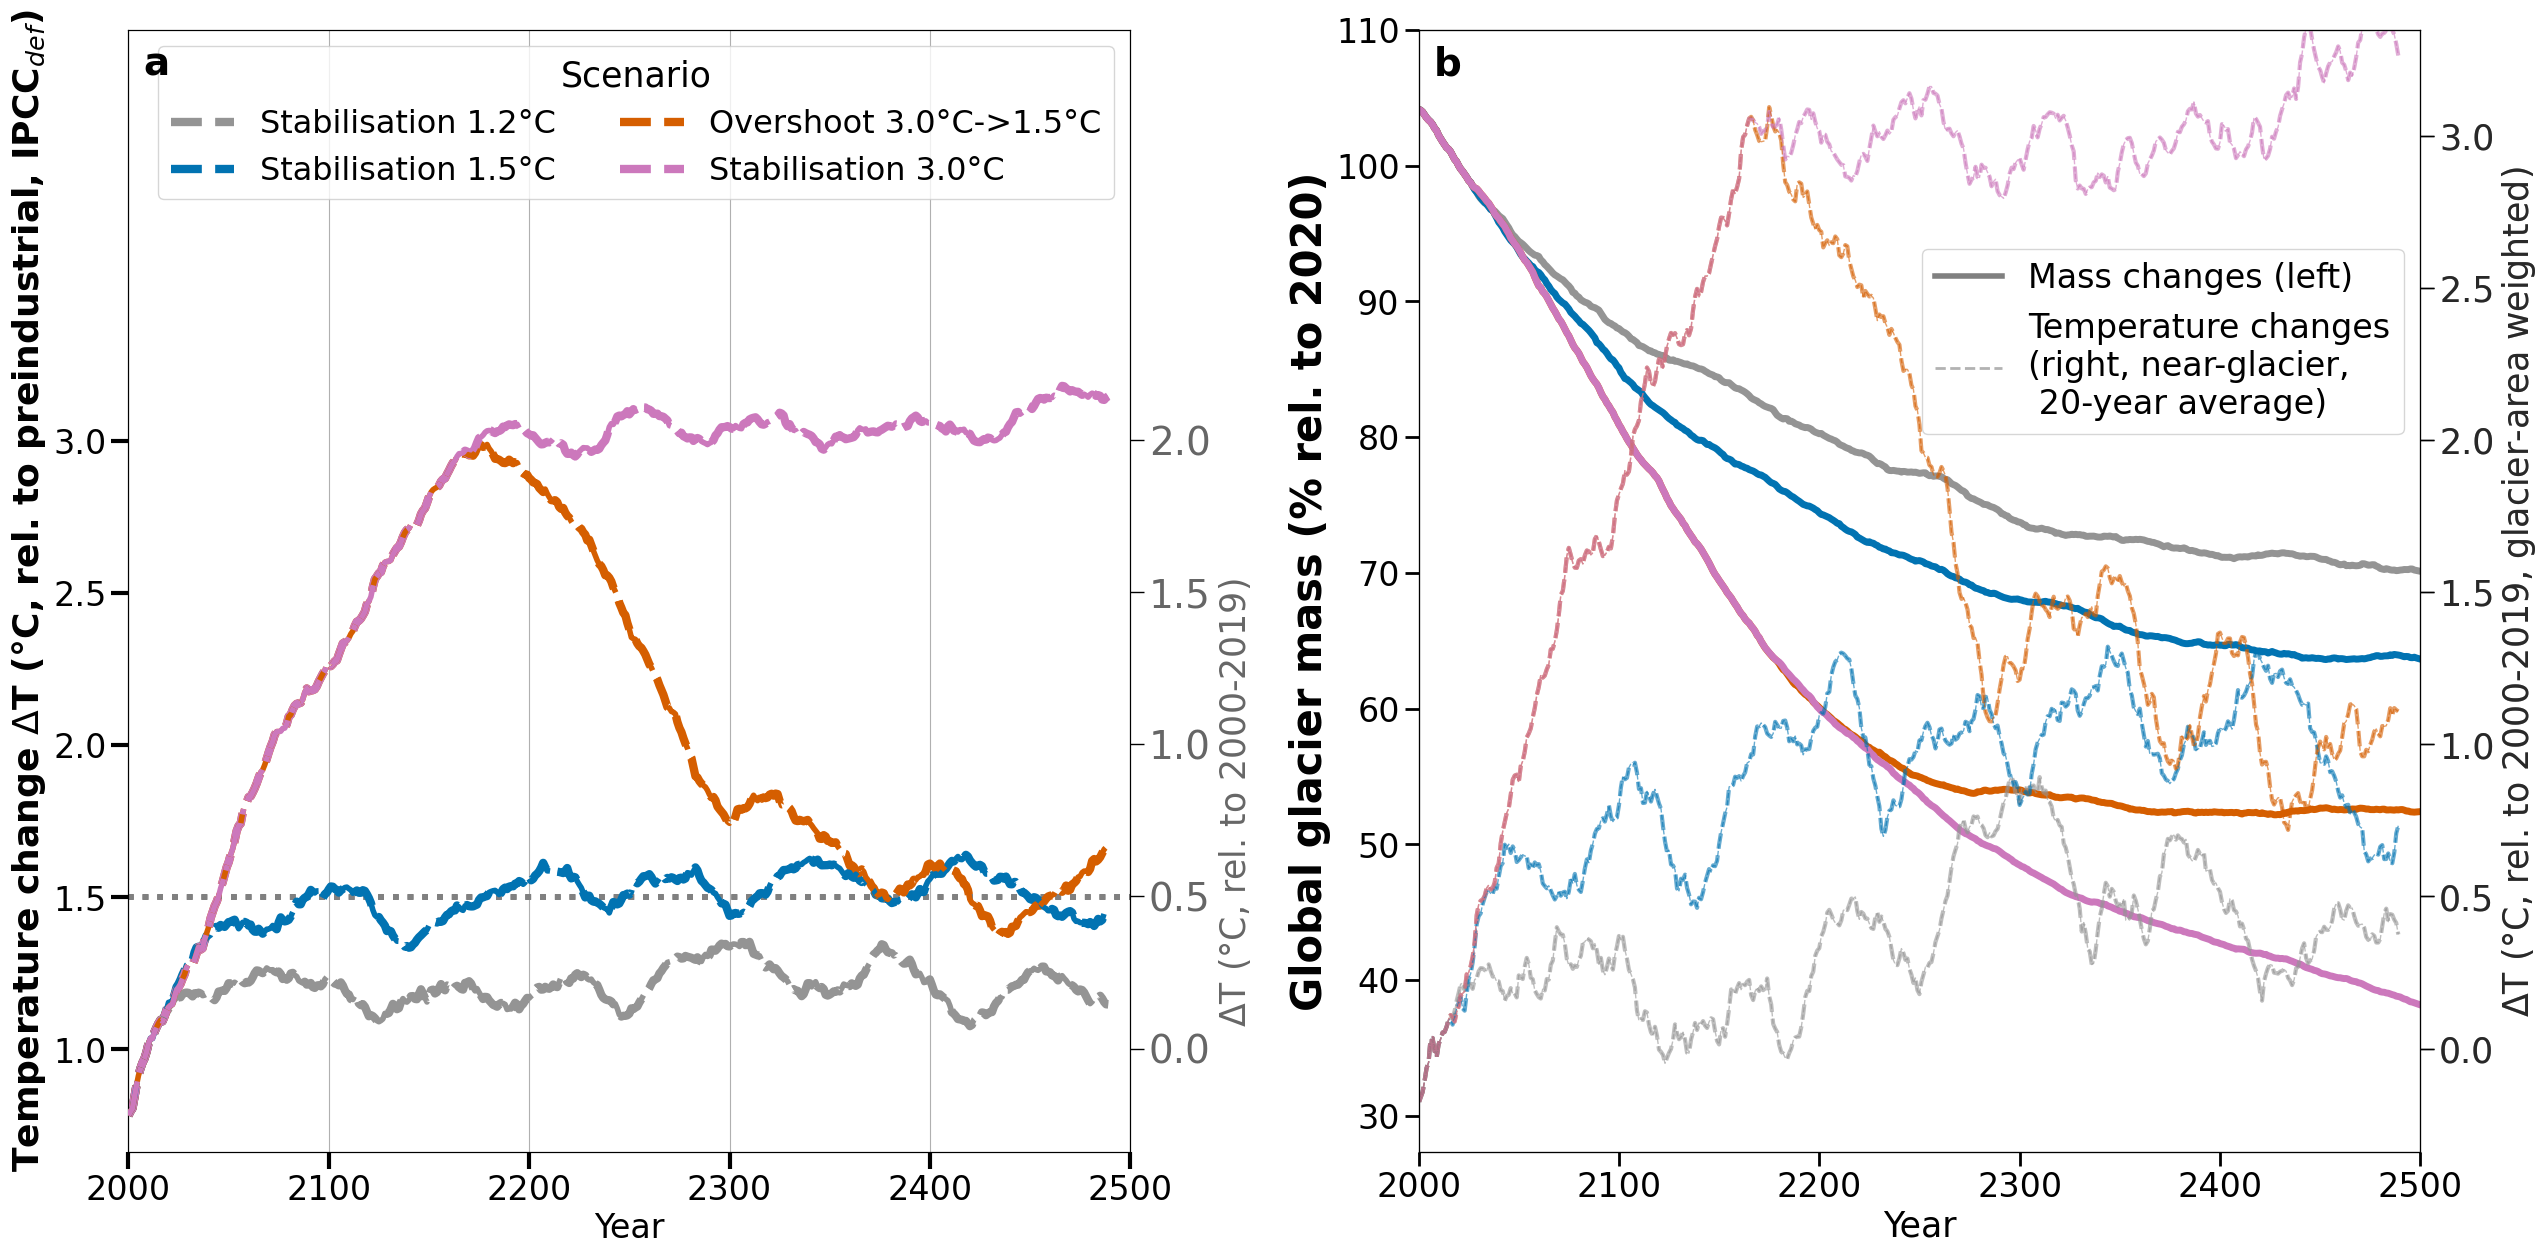

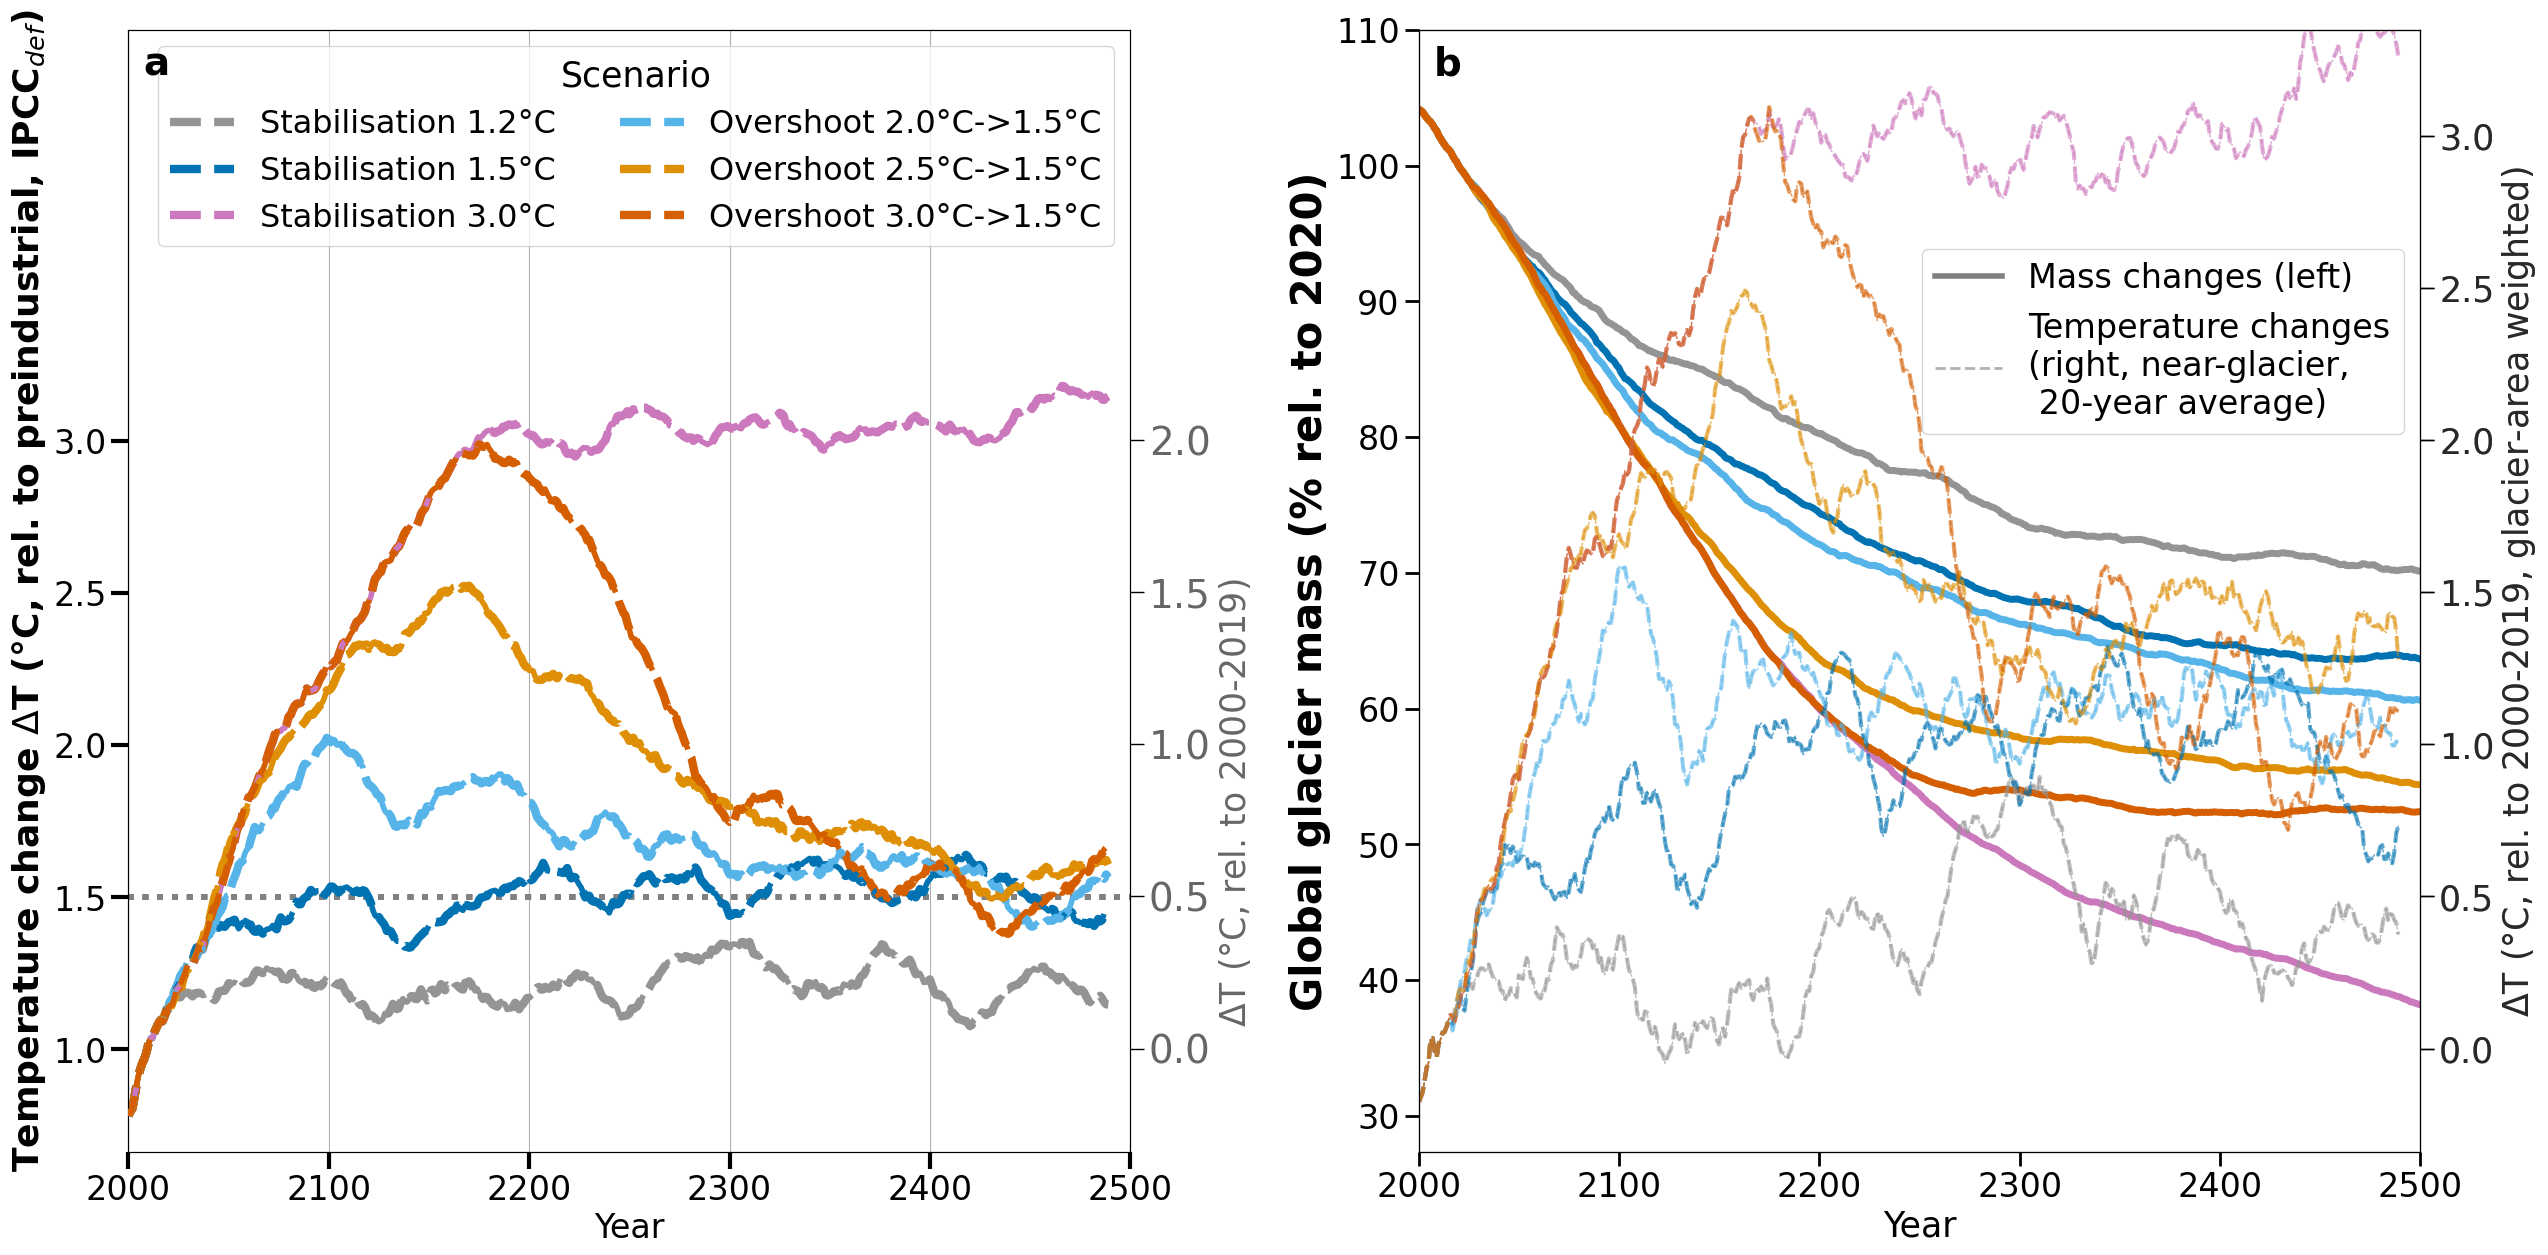

In [4]:
plt.rc('font', size=24)
fs = 25
shift = 1.05
for a,c_scenarios in zip([#'_all', 
                        '_poster_iugg',
                        '_all_overshoots'],
                       [#color_scenario.keys(),
                        color_scenario_poster, 
                        color_scenario_all_oversh]): #'commitment run (2000-2019)',
    scenarios = c_scenarios.keys()
    for j,var in enumerate(['temp_21yr_avg',
                            #'precip_20yr_avg'
                           ]):
        fig, axs = plt.subplots(1,2, figsize=(26,13))

        #####################
        ax = axs[0] #[0]
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            pd_clim_scenario_g_ref = pd_clim_scenario_g.loc[1986:2005]['temp'].mean()
            
            if var == 'temp_21yr_avg':
                var_g_to_ref = pd_clim_scenario_g[var]- pd_clim_scenario_g_ref + 0.69
                if 'commit' in scenario:
                    pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario=='stab_T15']
                    pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
                    pd_clim_scenario_g.index = pd_clim_scenario_g.year
                    pd_clim_scenario_g_ref = pd_clim_scenario_g.loc[1986:2005]['temp'].mean()
                    var_g_to_ref = mean_2000_2019_avg - pd_clim_scenario_g_ref + 0.69
                    var_g_to_ref = np.repeat(var_g_to_ref,len(np.arange(1979,2500,1)))
                #var_g_to_ref = pd_clim_scenario_g[var]/precip_ref_g
                if 'oversh' in scenario:
                    ls = '--'
                elif 'stab' in scenario:
                    ls = '--'
                else:
                    ls = '--'
                ax.plot(np.arange(2000,2500,1), #pd_clim_scenario_g.year,
                        var_g_to_ref.loc[2000:],
                        ls = ls,
                         lw=6, color = color_scenario[scenario], label=label_scenario[scenario], zorder=5)
                ax.set_xlabel('Year')
                ax.set_title(scenario)
                ax.axhline(1.5, color = 'grey', lw = 4, ls = ':')
                ax.set_yticks(ticks=[1.0,1.5,2.0, 2.5, 3.0],
                           labels=[1.0,1.5,2.0, 2.5, 3.0])   
            else:
                ax.set_yticks([],[])
        ylim_ax = ax.get_ylim()
        ax.set_ylim([ylim_ax[0], ylim_ax[1]+shift])
        ax2 = ax.twinx()    
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            if var == 'temp_21yr_avg':
                var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g
            else:
                var_g_to_ref = 100*pd_clim_scenario_g[var]/precip_ref_g
            if 'oversh' in scenario:
                ls = '--'
            elif 'stab' in scenario:
                ls = '-.'
            else:
                ls = '-'
            ax2.plot(pd_clim_scenario_g.year.loc[2000:],
                     var_g_to_ref.loc[2000:], ls = ls,
                     lw=4, color = color_scenario[scenario], label=label_scenario[scenario],
                    zorder=5)
            #ax.axhline(1.5, color = 'grey', lw = 3, ls = '--')
        if var == 'temp_21yr_avg':
            ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0],
                           labels=[0.0,0.5,1.0,1.5,2.0], alpha=0.6, fontsize=fs)   
        else:
            ax2.set_yticks(ticks=[100, 101, 102,103,104],
                           labels=[100, 101, 102,103,104], alpha=0.6, fontsize=fs)   
        ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)
        ylim_ax2 = ax2.get_ylim()
        ax2.set_ylim([ylim_ax2[0], ylim_ax2[1]+shift])
        handles, labels = ax.get_legend_handles_labels()
        if a=='':
            ncol=1
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)], title='scenarios reaching +1.5°C\n(20-year average)', ncol=ncol)

        else:
            ncol=2
            if a=='_all':
                fontsize=22
            else:
                fontsize=22
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)],ncol=2,
                            fontsize=23, #fontsize,
                            title = 'Scenario',
                            #fontsize=20,
                            title_fontsize=25,
                            bbox_to_anchor=(1,1), loc='upper right', # TODO
                           ) #, title='Scenarios:')
            #for handle in handles:
            #    handle.set_linewidth(0.5)  # Set the handle linewidth
        if var != 'temp_21yr_avg':
            leg.remove()
        #ax.grid()
        ax.set_xlabel('Year')
        if var == 'temp_21yr_avg':
            #ax.set_ylabel(r'$\Delta$T'+r'(°C) (rel. to preindustrial, IPCC$_{def}$)', weight='bold', fontsize=fs+3)
            ax.set_ylabel(r'Temperature change $\Delta$T'+r' (°C, rel. to preindustrial, IPCC$_{def}$)', weight='bold', fontsize=fs+1)

            ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019)                                       ', alpha =0.6, fontsize=fs)
            #ax.set_title(r'Global temperature changes ($\Delta$T, 20-year average)', fontsize=32)
            #ax.set_ylim([0,3.2])
        else:
            #ax.set_ylabel(r'precipitation ratio (relative to preindustrial levels)', weight='bold')
            ax2.set_ylabel(r'precipitation ratio (%, relative to 2000-2019)', alpha =0.6,fontsize=fs)
            #ax.set_title(r'Global precipitation changes')
        ax.set_title('')
        plt.tight_layout()
        plt.xlim([2000,2500])
        ax.grid(axis='x')
        ax.tick_params(axis='both', which='major', width=3, length=12)
        plt.yticks(fontsize=28)
        plt.xticks(fontsize=28)
        ylim_ax2 = ax2.get_ylim()

        ##################
        # volume plot
        
        #####
        ax = axs[1]
        color_scenarios = c_scenarios #.keys()) #color_scenario_manuscript
        for alpha in [0,1]: # 0
            if alpha == 0:
                lw_temp =3
            else:
                lw_temp = 1
            scenarios = color_scenarios.keys()
            paletti = list(color_scenarios.values())     
            #fig, ax = plt.subplots(1,1, figsize=(16,10), sharex=True)
            pd_vol_scenario_rel = (100*df_scenario/df_scenario.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()
            df_scenario_glob = df_scenario.sum(dim='rgi_reg')
            pd_vol_scenario_glob = (100*df_scenario_glob/df_scenario_glob.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()

            ax.set_ylabel('Global glacier mass (% rel. to 2020)', weight='bold',alpha = alpha, fontsize=fs+5)

            sns.lineplot(data=pd_vol_scenario_glob.loc[pd_vol_scenario_glob.bias_correction==bc],
                         hue='scenario', x='time', y= 'volume_rel_2020_%', 
                         alpha = alpha,
                         palette=paletti,
                         hue_order=scenarios,lw=5, legend=True,
                         ax = ax)
            ax.set_xlabel('Year',  #weight='bold',
                          fontsize= fs)
            ax.tick_params(axis='both', which='major', width=2, length=10)
            ax.set_yticks(ticks=ax.get_yticks(), alpha=alpha)
            ax.grid(axis='x')
            ax.axhline(31, alpha=0)
            ax2 = ax.twinx()  
            for scenario in scenarios:
                            #'stab_T30']:

                pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
                pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global_glacier']
                pd_clim_scenario_g.index = pd_clim_scenario_g.year
                temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
                var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g

                ax2.plot(pd_clim_scenario_g.year,
                         var_g_to_ref,
                         alpha = 0.6, 
                         ls = '--',
                         lw=lw_temp, color = color_scenario[scenario], label=label_scenario[scenario])
            ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0,2.5,3.0],
                           labels=[0.0,0.5,1.0,1.5,2.0,2.5,3.0], alpha=0.6, fontsize=fs)
            #ax2.set_ylim([-0.9,5.9]);
            ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019, glacier-area weighted)', alpha =0.6, fontsize = fs);
            ax2.tick_params(axis='both', which='major', width=1, length=10)
            ax2.axhline(-1, alpha=0)
            ax2.axhline(3.7, alpha=0)
            ax2.set_ylim(ylim_ax2)
            #plt.ylim([-2,122]);
            plt.tight_layout()

            ### add legends
            handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()
            handles_2, labels_2 = ax2.get_legend_handles_labels()
            if a == '_poster_iugg':
                leg = ax.legend(handles[:len(scenarios)], labels_2[:len(scenarios)], title='Scenarios',
                                fontsize=20, title_fontsize=22, bbox_to_anchor=(1,0.82), loc='upper right')
            else:
                leg = ax.legend(handles[:len(scenarios)], labels_2[:len(scenarios)], title='Scenarios',
                                fontsize=20, title_fontsize=22, #bbox_to_anchor=(1,1),
                                loc='lower center', ncol=2)
            for l in leg.get_lines():
                l.set_linewidth(4)
            leg.remove()
            if alpha !=0:
                leg2 = ax.legend([handles[0], handles_2[0]], ['Mass changes (left)',
                                                              f'Temperature changes\n(right, near-glacier,\n 20-year average)'],
                                 loc='upper right', ncol=1, fontsize=24,
                                 bbox_to_anchor=(1,0.82),
                                )
                leg2.get_lines()[0].set_linewidth(4)
                leg2.get_lines()[1].set_linewidth(2)
                for l in leg2.get_lines():
                    l.set_color('grey')
            #ax.add_artist(leg)
            #if a == '_poster_iugg':
            #    pass
            #    ax.text(0.98,0.98, 'Globally',
            #             transform=ax.transAxes,ha='right',va='top',
            #             color='grey', fontsize=24)
            #else:
            #ax.set_title('Global glacier volume evolution')

            #plt.tight_layout()
            #plt.savefig(f'2_global_glacier_volume{a}_{bc}_vol{alpha}.pdf')
            #plt.savefig(f'2_global_glacier_volume{a}_{bc}_vol{alpha}.png')
        plt.xlim([2000,2500])

        num_text_x = 0.015
        num_text_y = 0.96
        for j,axi in enumerate(axs):
            axi.text(num_text_x, num_text_y,
                     num_dict[j], fontsize=28, transform=axi.transAxes, zorder=10, weight='bold')
        #ax2.yticks(fontsize=26)

        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.pdf')
        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.png')
        plt.tight_layout()
        plt.savefig(f'figures/fig_2_temp_vol_glob{a}_{alpha}.pdf')
        plt.savefig(f'figures/fig_2_temp_vol_glob{a}_{alpha}.png', dpi=300)

**one colunm appproach --> new**

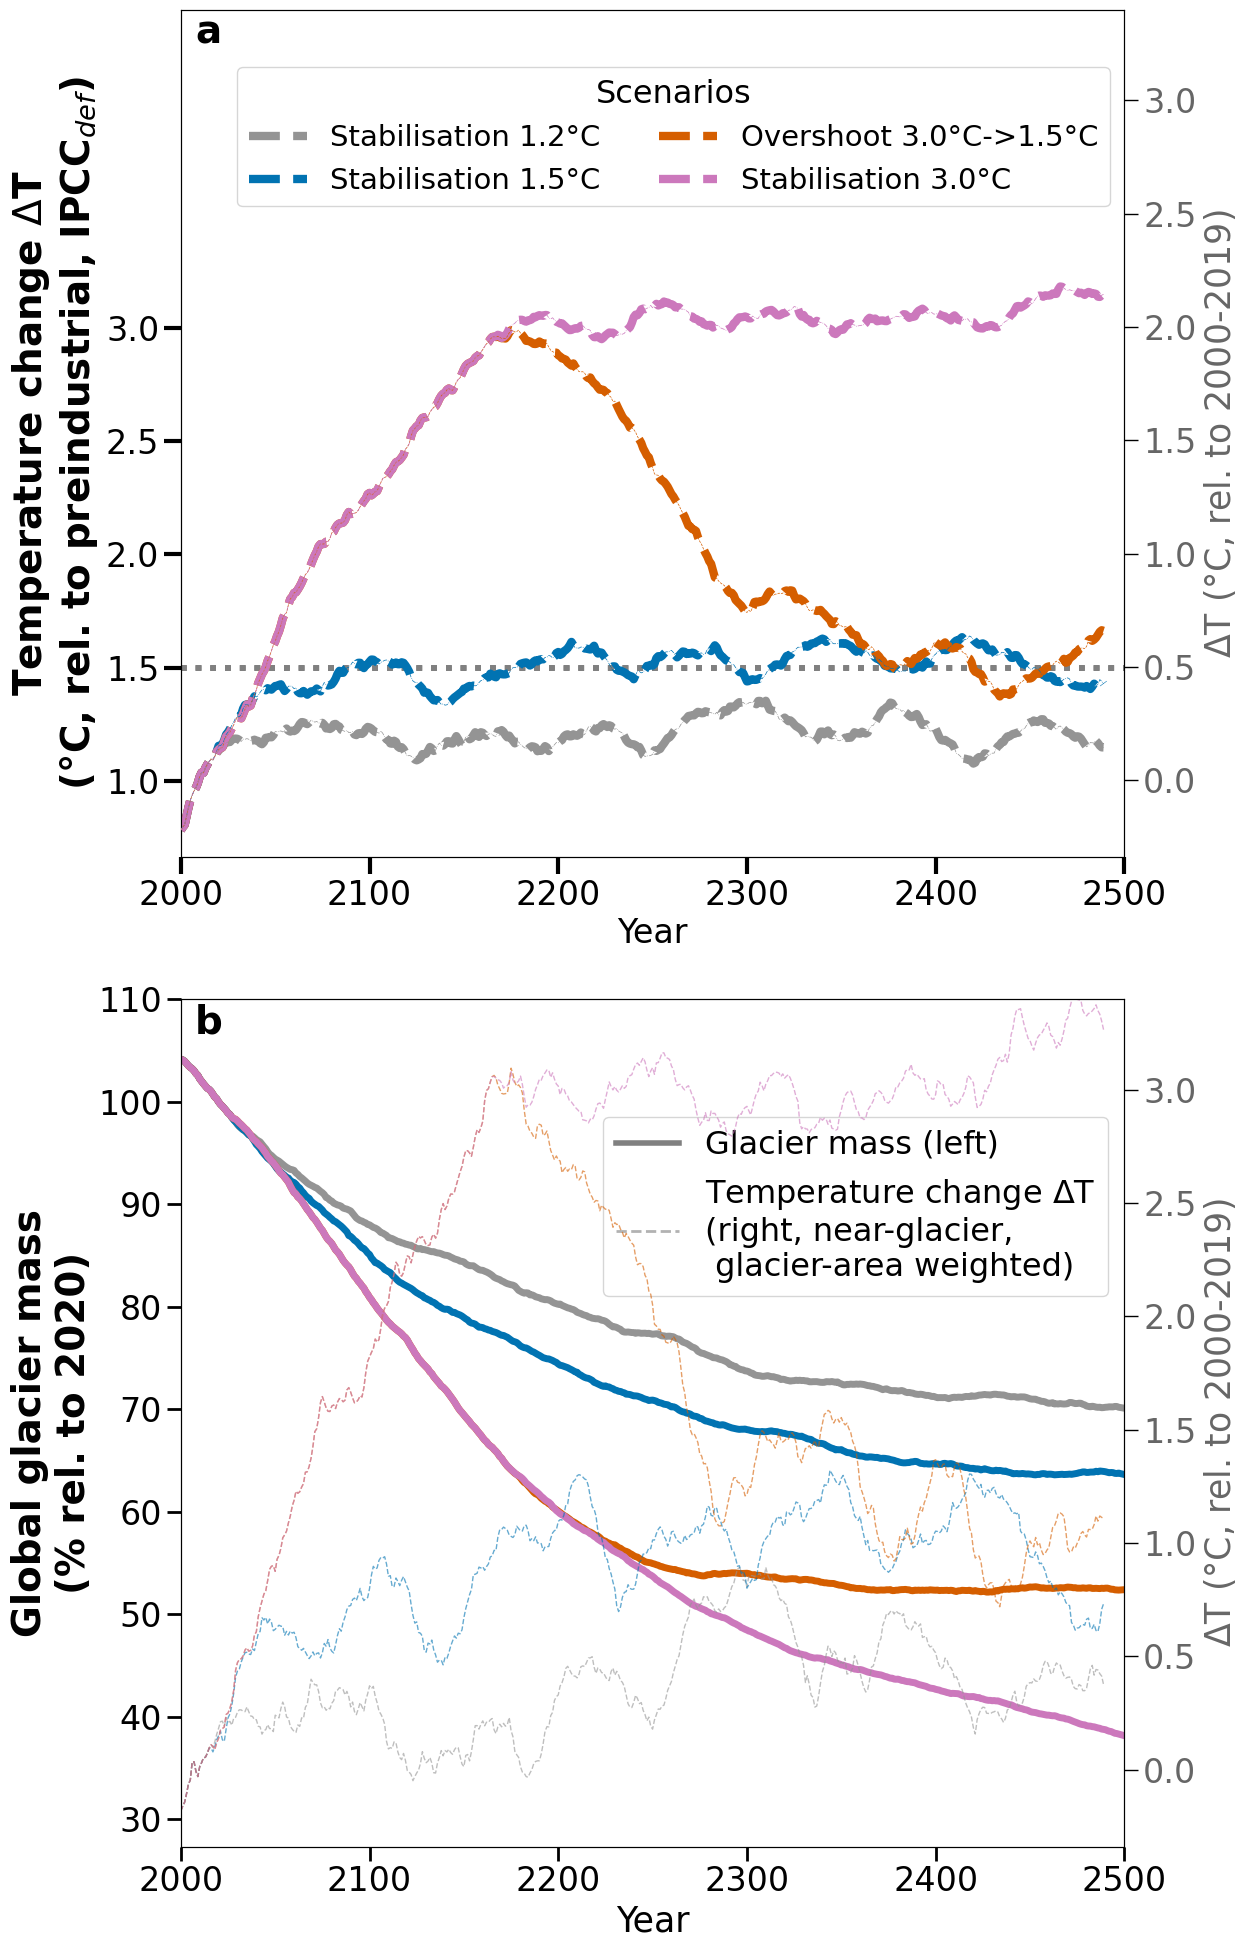

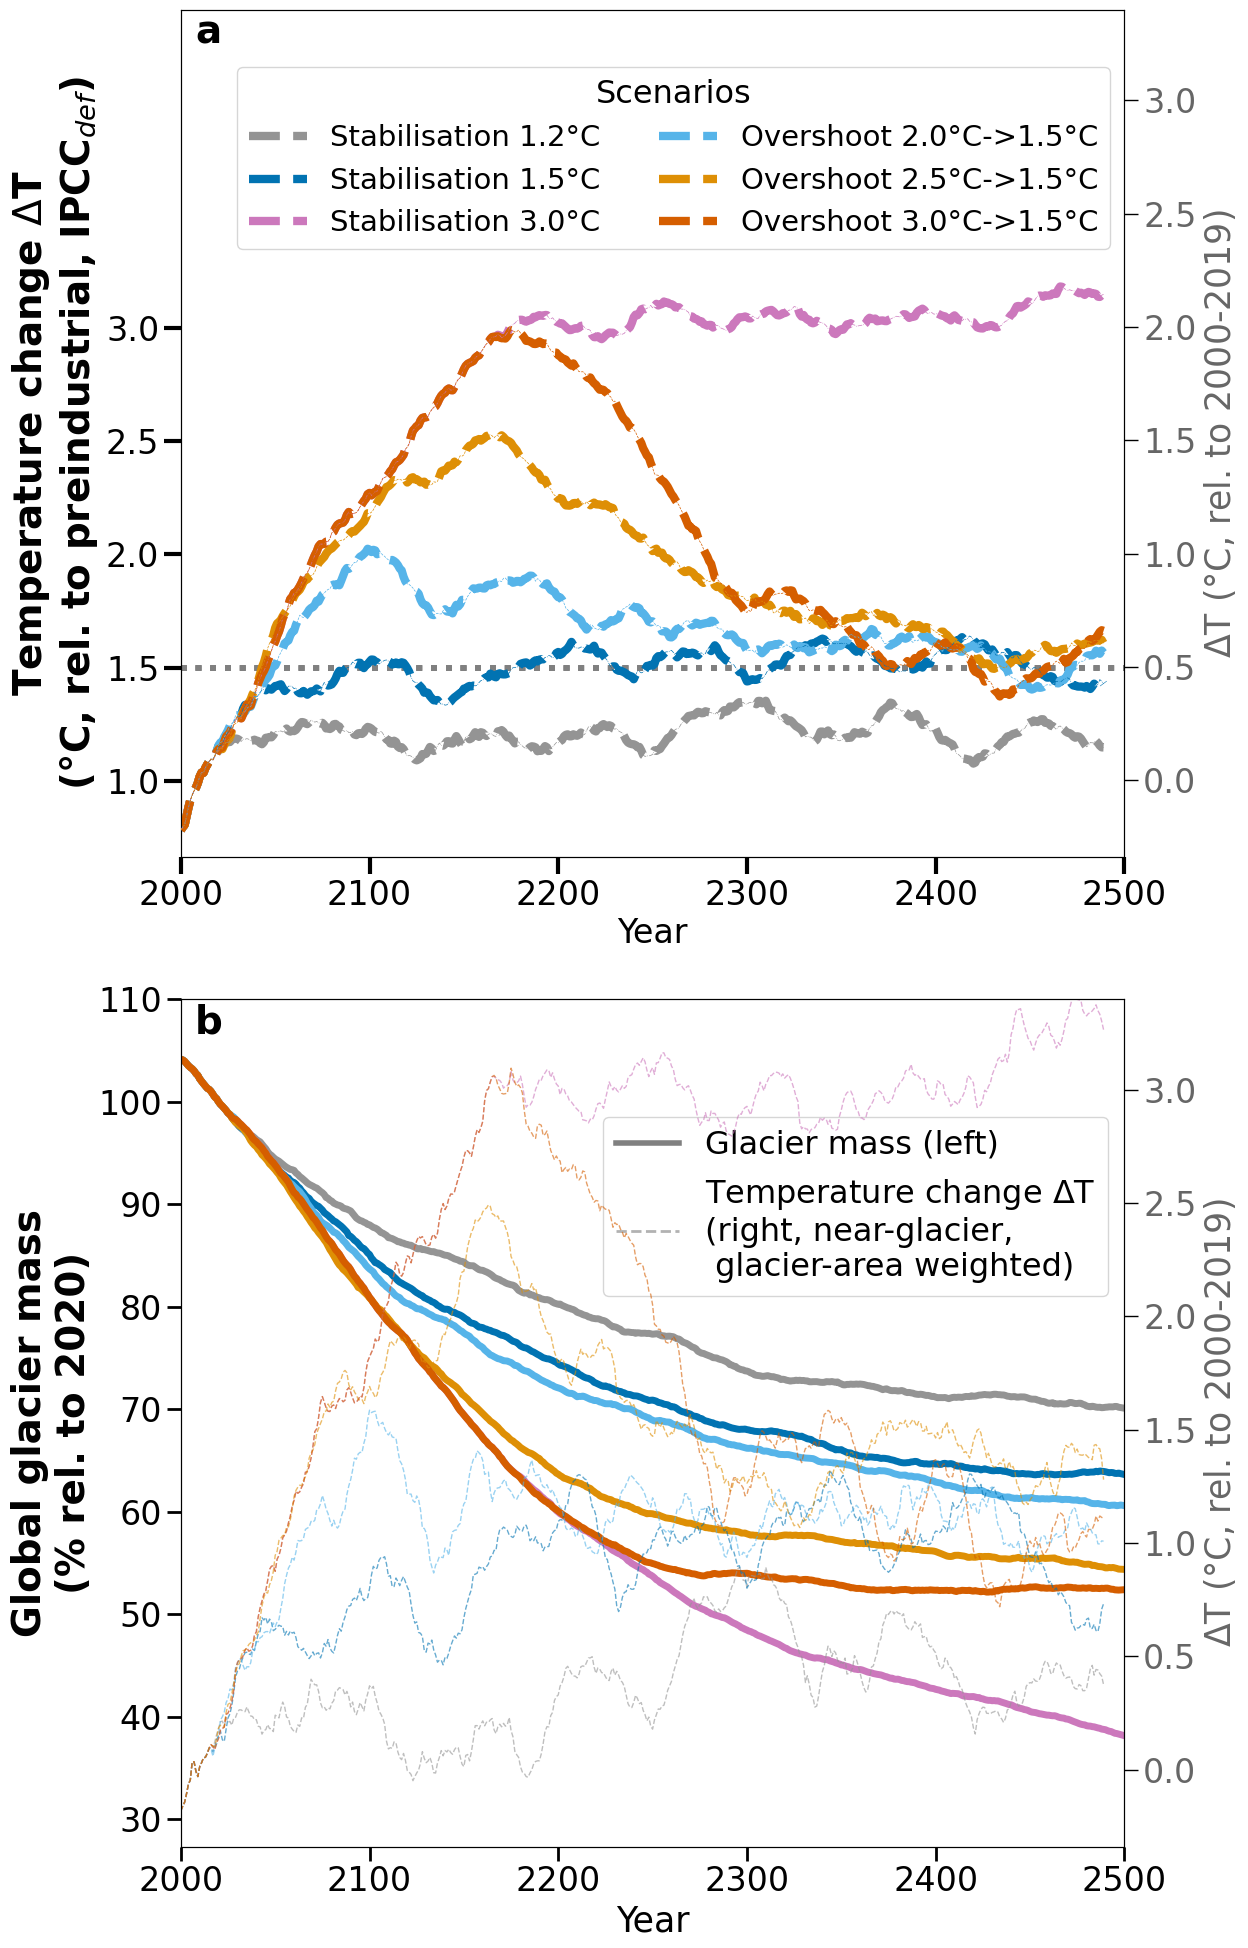

In [5]:
plt.rc('font', size=24)
fs = 25
shift = 1.1
alpha = 1
for a,c_scenarios in zip([#'_all', 
                        '_poster_iugg',
                        '_all_overshoots'],
                       [#color_scenario.keys(),
                        color_scenario_poster, 
                        color_scenario_all_oversh]): #'commitment run (2000-2019)',
    scenarios = c_scenarios.keys()
    for j,var in enumerate(['temp_21yr_avg',
                            #'precip_20yr_avg'
                           ]):
        fig, axs = plt.subplots(2,1, figsize=(13,20))
        #####################
        ax = axs[0] #[0]
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            pd_clim_scenario_g_ref = pd_clim_scenario_g.loc[1986:2005]['temp'].mean()

            if var == 'temp_21yr_avg':
                var_g_to_ref = pd_clim_scenario_g[var]- pd_clim_scenario_g_ref + 0.69
                #var_g_to_ref = pd_clim_scenario_g[var]/precip_ref_g
                if 'oversh' in scenario:
                    ls = '--'
                elif 'stab' in scenario:
                    ls = '--'
                else:
                    ls = '--'
                ax.plot(np.arange(2000,2500,1), #pd_clim_scenario_g.year,
                        var_g_to_ref.loc[2000:],
                        ls = ls,
                         lw=6, color = color_scenario[scenario], label=label_scenario[scenario], zorder=5)
                ax.set_xlabel('Year')
                ax.set_title(scenario)
                ax.axhline(1.5, color = 'grey', lw = 4, ls = ':')
                ax.set_yticks(ticks=[1.0,1.5,2.0, 2.5, 3.0],
                           labels=[1.0,1.5,2.0, 2.5, 3.0])   
            else:
                ax.set_yticks([],[])
        ylim_ax = ax.get_ylim()
        ax.set_ylim([ylim_ax[0], ylim_ax[1]+shift])
        ax2 = ax.twinx()    
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            if var == 'temp_21yr_avg':
                var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g
            else:
                var_g_to_ref = 100*pd_clim_scenario_g[var]/precip_ref_g
            if 'oversh' in scenario:
                ls = '--'
            elif 'stab' in scenario:
                ls = '-.'
            else:
                ls = '-'
            ax2.plot(pd_clim_scenario_g.year.loc[2000:],
                     var_g_to_ref.loc[2000:], ls = ls,
                     lw=0.5, color = color_scenario[scenario], label=label_scenario[scenario],
                    zorder=5)
            #ax.axhline(1.5, color = 'grey', lw = 3, ls = '--')
        ylim_ax2 = ax2.get_ylim()
        ax2.set_ylim([ylim_ax2[0], ylim_ax2[1]+shift])
        ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)
        ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0],
                           labels=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0], alpha=0.6, fontsize=fs-1)
        handles, labels = ax.get_legend_handles_labels()
        if a=='':
            ncol=1
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)], 
                            title='scenarios reaching +1.5°C\n(21-year average)', fontsize=22, ncol=ncol)
        else:
            ncol=2
            if a=='_all':
                fontsize=22
            else:
                fontsize=22
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)],ncol=2,
                            fontsize=21, #fontsize,
                            title = 'Scenarios',
                            #fontsize=20,
                            title_fontsize=23,
                            bbox_to_anchor=(1,0.95), loc='upper right', # TODO
                           ) #, title='Scenarios:')
            #for handle in handles:
            #    handle.set_linewidth(0.5)  # Set the handle linewidth
        if var != 'temp_21yr_avg':
            leg.remove()
        #ax.grid()
        ax.set_xlabel('Year')
        if var == 'temp_21yr_avg':
            #ax.set_ylabel(r'$\Delta$T'+r'(°C) (rel. to preindustrial, IPCC$_{def}$)', weight='bold', fontsize=fs+3)
            ax.set_ylabel(r'Temperature change $\Delta$T'+'\n'+r'(°C, rel. to preindustrial, IPCC$_{def}$)', weight='bold', fontsize=fs+3)

            ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019)', alpha =0.6, fontsize=fs)
            #ax.set_title(r'Global temperature changes ($\Delta$T, 20-year average)', fontsize=32)
            #ax.set_ylim([0,3.2])
        else:
            #ax.set_ylabel(r'precipitation ratio (relative to preindustrial levels)', weight='bold')
            ax2.set_ylabel(r'precipitation ratio (%, relative to 2000-2019)', alpha =0.6,fontsize=fs)
            #ax.set_title(r'Global precipitation changes')
        ax.set_title('')
        plt.tight_layout()
        plt.xlim([2000,2500])
        #ax.grid(axis='x')
        ax.tick_params(axis='both', which='major', width=3, length=12)
        #plt.yticks(fontsize=28)
        plt.xticks(fontsize=28)
        ylim_ax2 = ax2.get_ylim()

        #######################
        # volume plot
        #####
        ax = axs[1]
        color_scenarios = c_scenarios #.keys()) #color_scenario_manuscript
        for alpha in [0,1]: # 0
            if alpha == 0:
                lw_temp =3
            else:
                lw_temp = 1
            scenarios = color_scenarios.keys()
            paletti = list(color_scenarios.values())     
            #fig, ax = plt.subplots(1,1, figsize=(16,10), sharex=True)
            pd_vol_scenario_rel = (100*df_scenario/df_scenario.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()
            df_scenario_glob = df_scenario.sum(dim='rgi_reg')
            pd_vol_scenario_glob = (100*df_scenario_glob/df_scenario_glob.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()

            ax.set_ylabel('Global glacier mass\n(% rel. to 2020)', weight='bold',alpha = alpha, fontsize=fs+3)

            sns.lineplot(data=pd_vol_scenario_glob.loc[pd_vol_scenario_glob.bias_correction==bc],
                         hue='scenario', x='time', y= 'volume_rel_2020_%', 
                         alpha = alpha,
                         palette=paletti,
                         hue_order=scenarios,lw=5, legend=True,
                         ax = ax)
            ax.set_xlabel('Year',  #weight='bold','
                          fontsize= fs)
            ax.tick_params(axis='both', which='major', width=2, length=10)
            ax.set_yticks(ticks=ax.get_yticks(), alpha=alpha)
            ax.grid(axis='x')
            ax.axhline(31, alpha=0)

            #plt.ylim([-2,122]);
            plt.tight_layout()

            ### add legends
            handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()
            if a == '_poster_iugg':
                leg = ax.legend(handles[:len(scenarios)], labels_2[:len(scenarios)], title='Scenarios',
                                fontsize=20, title_fontsize=22, bbox_to_anchor=(1,0.82), loc='upper right')
            else:
                leg = ax.legend(handles[:len(scenarios)], labels_2[:len(scenarios)], title='Scenarios',
                                fontsize=20, title_fontsize=22, #bbox_to_anchor=(1,1),
                                loc='lower center', ncol=2)
            for l in leg.get_lines():
                l.set_linewidth(4)
            leg.remove()

            #ax.add_artist(leg)
            #if a == '_poster_iugg':
            #    pass
            #    ax.text(0.98,0.98, 'Globally',
            #             transform=ax.transAxes,ha='right',va='top',
            #             color='grey', fontsize=24)
            #else:
            #ax.set_title('Global glacier volume evolution')

            #plt.tight_layout()
            #plt.savefig(f'2_global_glacier_volume{a}_{bc}_vol{alpha}.pdf')
            #plt.savefig(f'2_global_glacier_volume{a}_{bc}_vol{alpha}.png')

        ax2 = ax.twinx()  
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global_glacier']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g

            ax2.plot(pd_clim_scenario_g.year,
                     var_g_to_ref,
                     alpha = 0.6, 
                     ls = '--',
                     lw=lw_temp, color = color_scenario[scenario], label=label_scenario[scenario])
        #ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0,2.5,3.0],
        #               labels=[0.0,0.5,1.0,1.5,2.0,2.5,3.0], alpha=0.6) #, fontsize=fs)
        
        ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)
        ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0],
                           labels=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0], alpha=0.6,fontsize=fs-1)   #, fontsize=fs
        #ax2.set_ylim([-0.9,5.9]);
        # ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019, glacier-area weighted)', alpha =0.6, fontsize = fs);
        ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019)', alpha =0.6, fontsize=fs)

        #ax2.axhline(-1, alpha=0)
        #ax2.axhline(3.7, alpha=0)
        #ax2.set_ylim(ylim_ax2)
        ax2.set_ylim(ylim_ax2) # 

        if alpha !=0:
            leg2 = ax.legend([handles[0], handles_2[0]], ['Glacier mass (left)',
                                                          r'Temperature change $\Delta$T'+f'\n(right, near-glacier,\n glacier-area weighted)'],
                             loc='upper right', ncol=1, fontsize=23,
                             bbox_to_anchor=(1,0.88),
                            )
            leg2.get_lines()[0].set_linewidth(4)
            leg2.get_lines()[1].set_linewidth(2)
            for l in leg2.get_lines():
                l.set_color('grey')
        plt.xlim([2000,2500])

        num_text_x = 0.015
        num_text_y = 0.96
        for j,axi in enumerate(axs):
            axi.text(num_text_x, num_text_y,
                     num_dict[j], fontsize=28, transform=axi.transAxes, zorder=10, weight='bold')
        #ax2.yticks(fontsize=26)

        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.pdf')
        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.png')
        plt.tight_layout()
        plt.savefig(f'figures/fig_2_temp_vol_glob{a}_{alpha}_one_column.pdf')
        plt.savefig(f'figures/fig_2_temp_vol_glob{a}_{alpha}_one_column.png', dpi=300)

**David's suggestion**

In [10]:
scenario_ls = {'stab_T12': '-',
 'stab_T15': '-',
 'oversh_T30OS15': '--',
 'stab_T30': '-'}

In [40]:
stabs = ['stab_T12', 'stab_T15', 'stab_T30']

In [41]:
stabs_col = [color_scenario_poster['stab_T12'], color_scenario_poster['stab_T15'] , color_scenario_poster['stab_T30']]

In [44]:
label_scenario_david = {'stab_T12': '1.2 Stabilisation',
 'oversh_T30OS15': r'3.0$\rightarrow$1.5 Overshoot',
 'stab_T15': '1.5 Stabilisation',
 'stab_T30': '3.0 Stabilisation'}

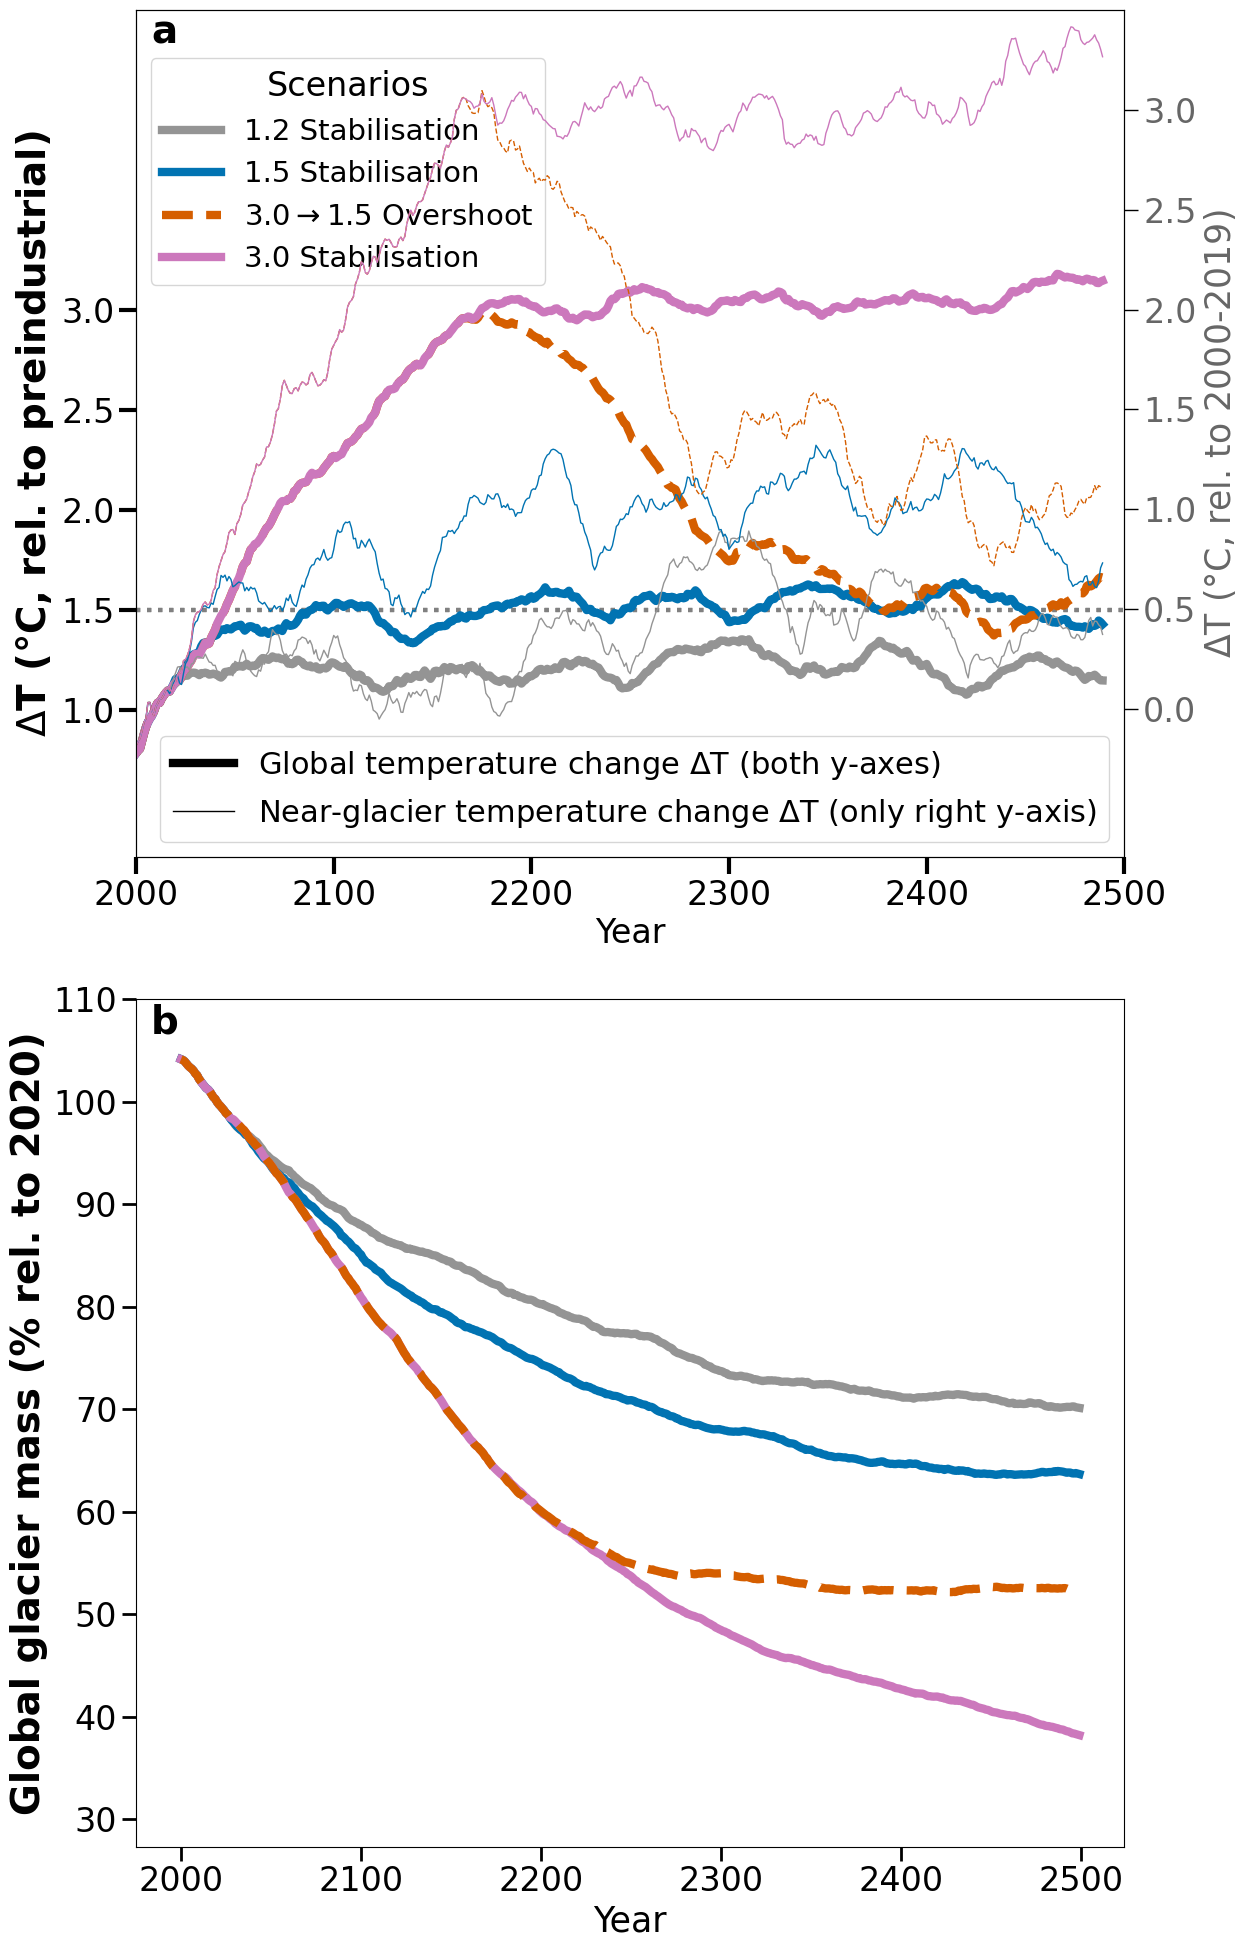

In [49]:
### David's version 

plt.rc('font', size=24)
fs = 25
shift = 1.2
shift_l = -0.4

alpha = 1
for a,c_scenarios in zip([#'_all', 
                        '_poster_iugg'],
                        #,
                        #'_all_overshoots'],
                       [#color_scenario.keys(),
                        color_scenario_poster
                       ]): #color_scenario_all_oversh]): #'commitment run (2000-2019)',
    scenarios = c_scenarios.keys()
    for j,var in enumerate(['temp_21yr_avg',
                            #'precip_20yr_avg'
                           ]):
        fig, axs = plt.subplots(2,1, figsize=(13,20))
        #####################
        ax = axs[0] #[0]
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            pd_clim_scenario_g_ref = pd_clim_scenario_g.loc[1986:2005]['temp'].mean()

            if var == 'temp_21yr_avg':
                var_g_to_ref = pd_clim_scenario_g[var]- pd_clim_scenario_g_ref + 0.69
                #var_g_to_ref = pd_clim_scenario_g[var]/precip_ref_g
                if 'oversh' in scenario:
                    ls = '--'
                elif 'stab' in scenario:
                    ls = '--'
                else:
                    ls = '--'
                ax.plot(np.arange(2000,2500,1), #pd_clim_scenario_g.year,
                        var_g_to_ref.loc[2000:],
                        ls = scenario_ls[scenario],
                         lw=6, color = color_scenario[scenario], label=label_scenario_david[scenario], zorder=5)
                ax.set_xlabel('Year')
                ax.set_title(scenario)
                ax.axhline(1.5, color = 'grey', lw = 3, ls = ':', alpha = 0.8)
                ax.set_yticks(ticks=[1.0,1.5,2.0, 2.5, 3.0],
                           labels=[1.0,1.5,2.0, 2.5, 3.0])   
            else:
                ax.set_yticks([],[])
        ylim_ax = ax.get_ylim()
        ax.set_ylim([ylim_ax[0]+shift_l, ylim_ax[1]+shift])
        ax2 = ax.twinx()    

        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            if var == 'temp_21yr_avg':
                var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g
            else:
                var_g_to_ref = 100*pd_clim_scenario_g[var]/precip_ref_g
            if 'oversh' in scenario:
                ls = '--'
            elif 'stab' in scenario:
                ls = '-.'
            else:
                ls = '-'
            ax2.plot(pd_clim_scenario_g.year.loc[2000:],
                     var_g_to_ref.loc[2000:], ls = scenario_ls[scenario], #ls,
                     lw=0,  #0.5,  # we actually do not want to see that one... <--- just put that to non-zero for tests ... 
                     color = color_scenario[scenario], label=label_scenario_david[scenario],
                    zorder=5)
            #ax.axhline(1.5, color = 'grey', lw = 3, ls = '--')
        ylim_ax2 = ax2.get_ylim()
        ax2.set_ylim([ylim_ax2[0]+shift_l, ylim_ax2[1]+shift])
        
        ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)
        ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0],
                           labels=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0], alpha=0.6, fontsize=fs-1)
        handles, labels = ax.get_legend_handles_labels()
        if a=='':
            ncol=1
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)], 
                            title='scenarios reaching +1.5°C\n(21-year average)', fontsize=22, ncol=ncol)
        else:
            ncol=2
            if a=='_all':
                fontsize=22
            else:
                fontsize=22
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)],ncol=1,
                            fontsize=21, #fontsize,
                            title = 'Scenarios',
                            #fontsize=20,
                            #title_fontsize=23,
                            bbox_to_anchor=(0,0.96), loc='upper left', # TODO
                           ) #, title='Scenarios:')
            #for handle in handles:
            #    handle.set_linewidth(0.5)  # Set the handle linewidth
        if var != 'temp_21yr_avg':
            leg.remove()
        #ax.grid()
        ax.set_xlabel('Year')
        if var == 'temp_21yr_avg':
            #ax.set_ylabel(r'$\Delta$T'+r'(°C) (rel. to preindustrial, IPCC$_{def}$)', weight='bold', fontsize=fs+3)
            ax.set_ylabel(r'$\Delta$T'+r' (°C, rel. to preindustrial)', weight='bold', fontsize=fs+3)

            ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019)', alpha =0.6, fontsize=fs)
            #ax.set_title(r'Global temperature changes ($\Delta$T, 20-year average)', fontsize=32)
            #ax.set_ylim([0,3.2])
        else:
            #ax.set_ylabel(r'precipitation ratio (relative to preindustrial levels)', weight='bold')
            ax2.set_ylabel(r'precipitation ratio (%, relative to 2000-2019)', alpha =0.6,fontsize=fs)
            #ax.set_title(r'Global precipitation changes')
        ax.set_title('')
        plt.tight_layout()
        plt.xlim([2000,2500])
        #ax.grid(axis='x')
        ax.tick_params(axis='both', which='major', width=3, length=12)
        #plt.yticks(fontsize=28)
        plt.xticks(fontsize=28)
        lw_temp_g = 1
        
        #ylim_ax2 = ax2.get_ylim()
        #ax2.set_ylim([ylim_ax2[0], ylim_ax2[1]+shift])
        ########## NOw add glacier temp. 
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global_glacier']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g

            ax2.plot(pd_clim_scenario_g.year,
                     var_g_to_ref,
                     alpha = 1, #0.8, 
                     ls = scenario_ls[scenario],
                     lw=lw_temp_g, color = color_scenario[scenario], label=label_scenario_david[scenario])
        handles, labels = ax.get_legend_handles_labels()
        handles_2, labels_2 = ax2.get_legend_handles_labels()

        #ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0,2.5,3.0],
        #               labels=[0.0,0.5,1.0,1.5,2.0,2.5,3.0], alpha=0.6) #, fontsize=fs)
        
        #ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)
        #ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0],
        #                   labels=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0], alpha=0.6,fontsize=fs-1)   #, fontsize=fs
        #ax2.set_ylim([-0.9,5.9]);
        # ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019, glacier-area weighted)', alpha =0.6, fontsize = fs);
        #ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019)', alpha =0.6, fontsize=fs)

        #ax2.axhline(-1, alpha=0)
        #ax2.axhline(3.7, alpha=0)
        #ax2.set_ylim(ylim_ax2)
        #ax2.set_ylim(ylim_ax2) # 
        
        
        
        
        if alpha !=0:
            leg2 = ax.legend([handles[0], handles_2[0]], ['Global temperature change $\Delta$T (both y-axes)',
                                                          r'Near-glacier temperature change $\Delta$T'+f' (only right y-axis)'],
                             loc='lower right', ncol=1, fontsize=22,
                             #bbox_to_anchor=(,0.88),
                            )
            leg2.get_lines()[0].set_linewidth(6)
            leg2.get_lines()[1].set_linewidth(1)
            for l in leg2.get_lines():
                l.set_color('black')
        ax.add_artist(leg)

        #######################
        # volume plot
        #####
        ax = axs[1]
        color_scenarios = c_scenarios #.keys()) #color_scenario_manuscript
        for alpha in [0,1]: # 0
            if alpha == 0:
                lw_temp =3
            else:
                lw_temp = 1
            scenarios = color_scenarios.keys()
            paletti = list(color_scenarios.values())     
            #fig, ax = plt.subplots(1,1, figsize=(16,10), sharex=True)
            pd_vol_scenario_rel = (100*df_scenario/df_scenario.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()
            df_scenario_glob = df_scenario.sum(dim='rgi_reg')
            pd_vol_scenario_glob = (100*df_scenario_glob/df_scenario_glob.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()

            ax.set_ylabel('Global glacier mass (% rel. to 2020)', weight='bold',alpha = alpha, fontsize=fs+3)
            # stabilisation scenarios with ls = '-'
            sns.lineplot(data=pd_vol_scenario_glob.loc[(pd_vol_scenario_glob.bias_correction==bc) & (pd_vol_scenario_glob.scenario != 'oversh_T30OS15')],
                         hue='scenario', x='time', y= 'volume_rel_2020_%', 
                         alpha = alpha,
                         palette=stabs_col,
                         hue_order=stabs,lw=6, legend=True,
                         ax = ax)
            # overshoot with '--'
            sns.lineplot(data=pd_vol_scenario_glob.loc[(pd_vol_scenario_glob.bias_correction==bc) & (pd_vol_scenario_glob.scenario == 'oversh_T30OS15')],
                         #hue='scenario',
                         x='time', y= 'volume_rel_2020_%', 
                         alpha = alpha,
                         color=color_scenario_poster['oversh_T30OS15'],
                         hue_order=['oversh_T30OS15'],lw=6, 
                         ls = '--',
                         legend=True,
                         ax = ax)
            ax.set_xlabel('Year',  #weight='bold','
                          fontsize= fs)
            ax.tick_params(axis='both', which='major', width=2, length=10)
            ax.set_yticks(ticks=ax.get_yticks(), alpha=alpha)
            ax.grid(axis='x')
            ax.axhline(31, alpha=0)

            #plt.ylim([-2,122]);
            plt.tight_layout()

            ### add legends
            handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()
            if a == '_poster_iugg':
                leg = ax.legend(handles[:len(scenarios)], labels_2[:len(scenarios)], title='Scenarios',
                                fontsize=20, title_fontsize=22, bbox_to_anchor=(1,0.82), loc='upper right')
            else:
                leg = ax.legend(handles[:len(scenarios)], labels_2[:len(scenarios)], title='Scenarios',
                                fontsize=20, title_fontsize=22, #bbox_to_anchor=(1,1),
                                loc='lower center', ncol=2)
            for l in leg.get_lines():
                l.set_linewidth(4)
            leg.remove()

            #ax.add_artist(leg)
            #if a == '_poster_iugg':
            #    pass
            #    ax.text(0.98,0.98, 'Globally',
            #             transform=ax.transAxes,ha='right',va='top',
            #             color='grey', fontsize=24)
            #else:
            #ax.set_title('Global glacier volume evolution')

            #plt.tight_layout()
            #plt.savefig(f'2_global_glacier_volume{a}_{bc}_vol{alpha}.pdf')
            #plt.savefig(f'2_global_glacier_volume{a}_{bc}_vol{alpha}.png')

        

        plt.xlim([2000,2500])

        num_text_x = 0.015
        num_text_y = 0.96
        for j,axi in enumerate(axs):
            axi.text(num_text_x, num_text_y,
                     num_dict[j], fontsize=28, transform=axi.transAxes, zorder=10, weight='bold')
        #ax2.yticks(fontsize=26)

        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.pdf')
        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.png')
        plt.tight_layout()
        plt.savefig(f'figures/fig_2_temp_vol_glob{a}_{alpha}_one_column_v_david.pdf')
        plt.savefig(f'figures/fig_2_temp_vol_glob{a}_{alpha}_one_column_v_david.png', dpi=300)

In [59]:
color_scenario_poster = 

{'stab_T12': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 'stab_T15': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 'oversh_T30OS15': (0.8352941176470589, 0.3686274509803922, 0.0),
 'stab_T30': (0.8, 0.47058823529411764, 0.7372549019607844)}

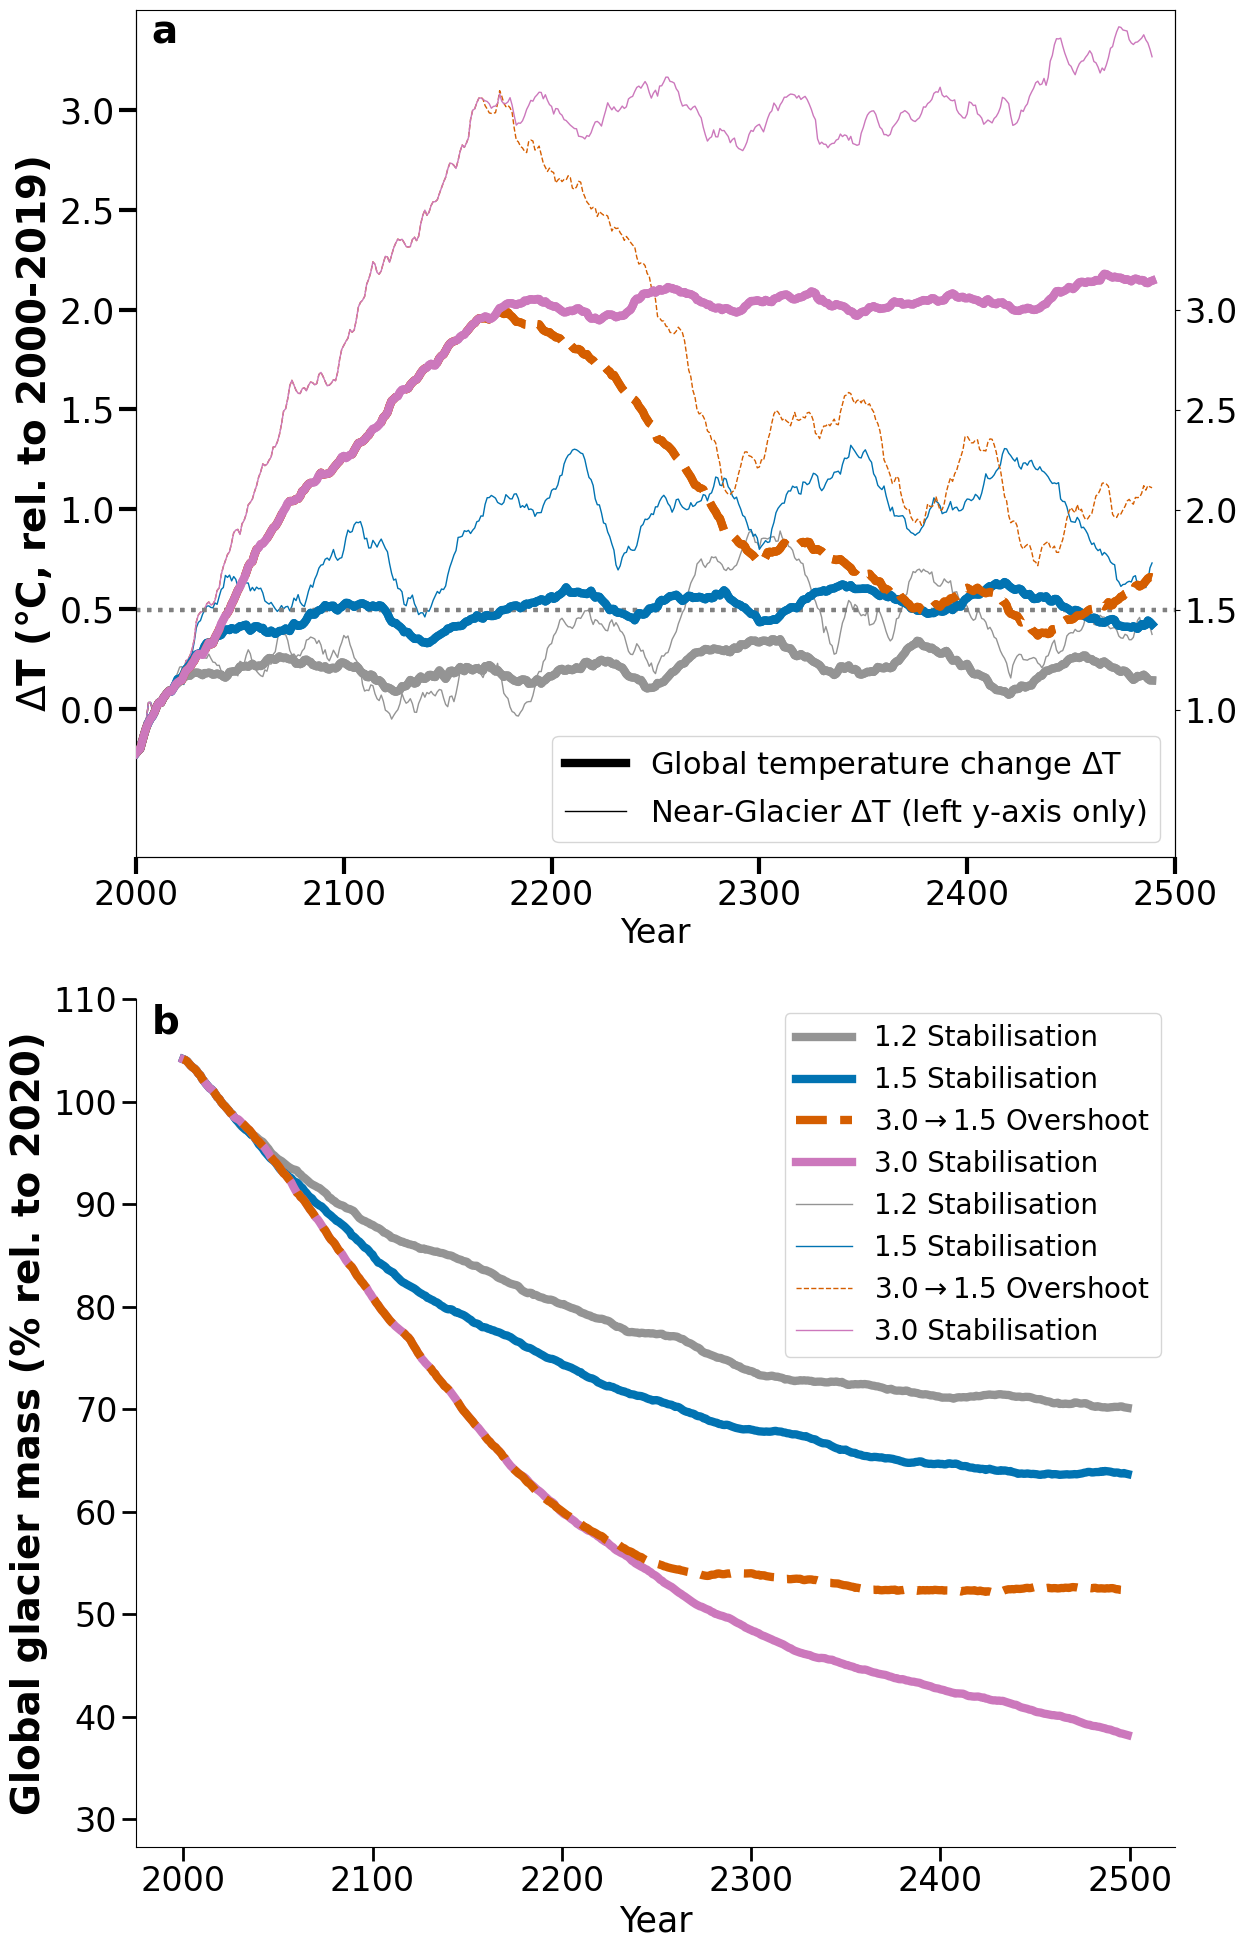

In [57]:
### David's version 

plt.rc('font', size=24)
fs = 25
shift = 1.2
shift_l = -0.4

alpha = 1
for a,c_scenarios in zip([#'_all', 
                        '_poster_iugg'],
                        #,
                        #'_all_overshoots'],
                       [#color_scenario.keys(),
                        color_scenario_poster
                       ]): #color_scenario_all_oversh]): #'commitment run (2000-2019)',
    scenarios = c_scenarios.keys()
    for j,var in enumerate(['temp_21yr_avg',
                            #'precip_20yr_avg'
                           ]):
        fig, axs = plt.subplots(2,1, figsize=(13,20))
        #####################
        ax = axs[0] #[0]
        ax_r = ax.twinx()
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            pd_clim_scenario_g_ref = pd_clim_scenario_g.loc[1986:2005]['temp'].mean()

            if var == 'temp_21yr_avg':
                var_g_to_ref = pd_clim_scenario_g[var]- pd_clim_scenario_g_ref + 0.69
                #var_g_to_ref = pd_clim_scenario_g[var]/precip_ref_g
                if 'oversh' in scenario:
                    ls = '--'
                elif 'stab' in scenario:
                    ls = '--'
                else:
                    ls = '--'
                ax_r.plot(np.arange(2000,2500,1), #pd_clim_scenario_g.year,
                        var_g_to_ref.loc[2000:],
                        ls = scenario_ls[scenario],
                         lw=6, color = color_scenario[scenario], label=label_scenario_david[scenario], zorder=5)
                ax_r.set_xlabel('Year')
                #ax_r.set_title(scenario)
                ax_r.axhline(1.5, color = 'grey', lw = 3, ls = ':', alpha = 0.8)
                ax_r.set_yticks(ticks=[1.0,1.5,2.0, 2.5, 3.0],
                           labels=[1.0,1.5,2.0, 2.5, 3.0])   
            else:
                ax_r.set_yticks([],[])
        ylim_ax = ax_r.get_ylim()
        ax_r.set_ylim([ylim_ax[0]+shift_l, ylim_ax[1]+shift])
        # we switch left and right axis .. 
        ax2 = ax ###

        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            if var == 'temp_21yr_avg':
                var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g
            else:
                var_g_to_ref = 100*pd_clim_scenario_g[var]/precip_ref_g
            if 'oversh' in scenario:
                ls = '--'
            elif 'stab' in scenario:
                ls = '-.'
            else:
                ls = '-'
            ax2.plot(pd_clim_scenario_g.year.loc[2000:],
                     var_g_to_ref.loc[2000:], ls = scenario_ls[scenario], #ls,
                     lw=6,  #0.5,  # we actually do not want to see that one... <--- just put that to non-zero for tests ... 
                     color = color_scenario[scenario], label=label_scenario_david[scenario],
                    zorder=5)
            #ax.axhline(1.5, color = 'grey', lw = 3, ls = '--')
        ylim_ax2 = ax2.get_ylim()
        ax2.set_ylim([ylim_ax2[0]+shift_l, ylim_ax2[1]+shift])
        
        ax2.tick_params(axis='both', which='major', width=3, length=12) #width=1, length=10) #, grid_alpha =0.6)
        ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0],
                           labels=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0], alpha=1, #0.6, 
                       fontsize=fs) #-1)
        handles, labels = ax.get_legend_handles_labels()
        if a=='':
            ncol=1
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)], 
                            title='scenarios reaching +1.5°C\n(21-year average)', fontsize=22, ncol=ncol)
        else:
            ncol=2
            if a=='_all':
                fontsize=22
            else:
                fontsize=22
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)],ncol=1,
                            fontsize=21, #fontsize,
                            title = 'Scenarios',
                            #fontsize=20,
                            #title_fontsize=23,
                            bbox_to_anchor=(0,0.96), loc='upper left', # TODO
                           ) #, title='Scenarios:')
            #for handle in handles:
            #    handle.set_linewidth(0.5)  # Set the handle linewidth
        if var != 'temp_21yr_avg':
            leg.remove()
        #ax.grid()
        ax.set_xlabel('Year')
        if var == 'temp_21yr_avg':
            #ax.set_ylabel(r'$\Delta$T'+r'(°C) (rel. to preindustrial, IPCC$_{def}$)', weight='bold', fontsize=fs+3)
            ax.set_ylabel(r'$\Delta$T'+r' (°C, rel. to preindustrial)', weight='bold', fontsize=fs+1)

            ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019)', alpha=1, fontsize=fs+3)
            #ax.set_title(r'Global temperature changes ($\Delta$T, 20-year average)', fontsize=32)
            #ax.set_ylim([0,3.2])
        else:
            #ax.set_ylabel(r'precipitation ratio (relative to preindustrial levels)', weight='bold')
            ax2.set_ylabel(r'precipitation ratio (%, relative to 2000-2019)', alpha =0.6,fontsize=fs)
            #ax.set_title(r'Global precipitation changes')
        ax.set_title('')
        plt.tight_layout()
        plt.xlim([2000,2500])
        #ax.grid(axis='x')
        ax.tick_params(axis='both', which='major', width=3, length=12)
        #plt.yticks(fontsize=28)
        plt.xticks(fontsize=28)
        lw_temp_g = 1
        
        #ylim_ax2 = ax2.get_ylim()
        #ax2.set_ylim([ylim_ax2[0], ylim_ax2[1]+shift])
        ########## NOw add glacier temp. 
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global_glacier']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g

            ax2.plot(pd_clim_scenario_g.year,
                     var_g_to_ref,
                     alpha = 1, #0.8, 
                     ls = scenario_ls[scenario],
                     lw=lw_temp_g, color = color_scenario[scenario], label=label_scenario_david[scenario])
        handles, labels = ax.get_legend_handles_labels()
        handles_2, labels_2 = ax2.get_legend_handles_labels()

        #ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0,2.5,3.0],
        #               labels=[0.0,0.5,1.0,1.5,2.0,2.5,3.0], alpha=0.6) #, fontsize=fs)
        
        #ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)
        #ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0],
        #                   labels=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0], alpha=0.6,fontsize=fs-1)   #, fontsize=fs
        #ax2.set_ylim([-0.9,5.9]);
        # ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019, glacier-area weighted)', alpha =0.6, fontsize = fs);
        #ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019)', alpha =0.6, fontsize=fs)

        #ax2.axhline(-1, alpha=0)
        #ax2.axhline(3.7, alpha=0)
        #ax2.set_ylim(ylim_ax2)
        #ax2.set_ylim(ylim_ax2) # 
        
        
        if alpha !=0:
            leg2 = ax.legend([handles[0], handles_2[0]], ['Global temperature change $\Delta$T',
                                                          r'Near-Glacier $\Delta$T'+f' (left y-axis only)'],
                             loc='lower right', ncol=1, fontsize=22,
                             #bbox_to_anchor=(,0.88),
                            )
            leg2.get_lines()[0].set_linewidth(6)
            leg2.get_lines()[1].set_linewidth(1)
            for l in leg2.get_lines():
                l.set_color('black')
                

        # Remove the top spine
        sns.despine(ax=ax2, top=True, right=False, left=False, bottom=False, offset=None, trim=False)

        # Manually trim only the right spine
        ax2.spines['right'].set_visible(True)
        ax2.spines['right'].set_bounds(ax2.get_ylim())

        # Optional: to avoid trimming left and bottom spines, ensure they are not trimmed explicitly
        ax2.spines['left'].set_visible(True)
        ax2.spines['bottom'].set_visible(True)
        #ax2.spines['left'].set_position(('outward', 10)) 
        
        #######################
        # volume plot
        #####
        ax = axs[1]
        color_scenarios = c_scenarios #.keys()) #color_scenario_manuscript
        for alpha in [0,1]: # 0
            if alpha == 0:
                lw_temp =3
            else:
                lw_temp = 1
            scenarios = color_scenarios.keys()
            paletti = list(color_scenarios.values())     
            #fig, ax = plt.subplots(1,1, figsize=(16,10), sharex=True)
            pd_vol_scenario_rel = (100*df_scenario/df_scenario.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()
            df_scenario_glob = df_scenario.sum(dim='rgi_reg')
            pd_vol_scenario_glob = (100*df_scenario_glob/df_scenario_glob.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()

            ax.set_ylabel('Global glacier mass (% rel. to 2020)', weight='bold',alpha = alpha, fontsize=fs+3)
            # stabilisation scenarios with ls = '-'
            sns.lineplot(data=pd_vol_scenario_glob.loc[(pd_vol_scenario_glob.bias_correction==bc) & (pd_vol_scenario_glob.scenario != 'oversh_T30OS15')],
                         hue='scenario', x='time', y= 'volume_rel_2020_%', 
                         alpha = alpha,
                         palette=stabs_col,
                         hue_order=stabs,lw=6, legend=False,
                         ax = ax)
            # overshoot with '--'
            sns.lineplot(data=pd_vol_scenario_glob.loc[(pd_vol_scenario_glob.bias_correction==bc) & (pd_vol_scenario_glob.scenario == 'oversh_T30OS15')],
                         #hue='scenario',
                         x='time', y= 'volume_rel_2020_%', 
                         alpha = alpha,
                         color=color_scenario_poster['oversh_T30OS15'],
                         hue_order=['oversh_T30OS15'],lw=6, 
                         ls = '--',
                         legend=False,
                         ax = ax)
            ax.set_xlabel('Year',  #weight='bold','
                          fontsize= fs)
            ax.tick_params(axis='both', which='major', width=2, length=10)
            ax.set_yticks(ticks=ax.get_yticks(), alpha=alpha)
            ax.grid(axis='x')
            ax.axhline(31, alpha=0)

            #plt.ylim([-2,122]);
            #plt.tight_layout()

            ### add legends
            #handles, labels = ax.get_legend_handles_labels()
            #ax.get_legend().remove()
            ax.legend(handles, labels, loc = 'upper right', fontsize=20)
        sns.despine(ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)


        plt.xlim([2000,2500])

        num_text_x = 0.015
        num_text_y = 0.96
        for j,axi in enumerate(axs):
            axi.text(num_text_x, num_text_y,
                     num_dict[j], fontsize=28, transform=axi.transAxes, zorder=10, weight='bold')
        #ax2.yticks(fontsize=26)

        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.pdf')
        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.png')
        plt.tight_layout()
        plt.savefig(f'figures/fig_2_temp_vol_glob{a}_{alpha}_one_column_v_david_fabien.pdf')
        plt.savefig(f'figures/fig_2_temp_vol_glob{a}_{alpha}_one_column_v_david_fabien.png', dpi=300)

In [61]:
color_scenario_poster = {'stab_T12': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 'stab_T15': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 'stab_T30': (0.8, 0.47058823529411764, 0.7372549019607844),
                         'oversh_T30OS15': (0.8352941176470589, 0.3686274509803922, 0.0),
}

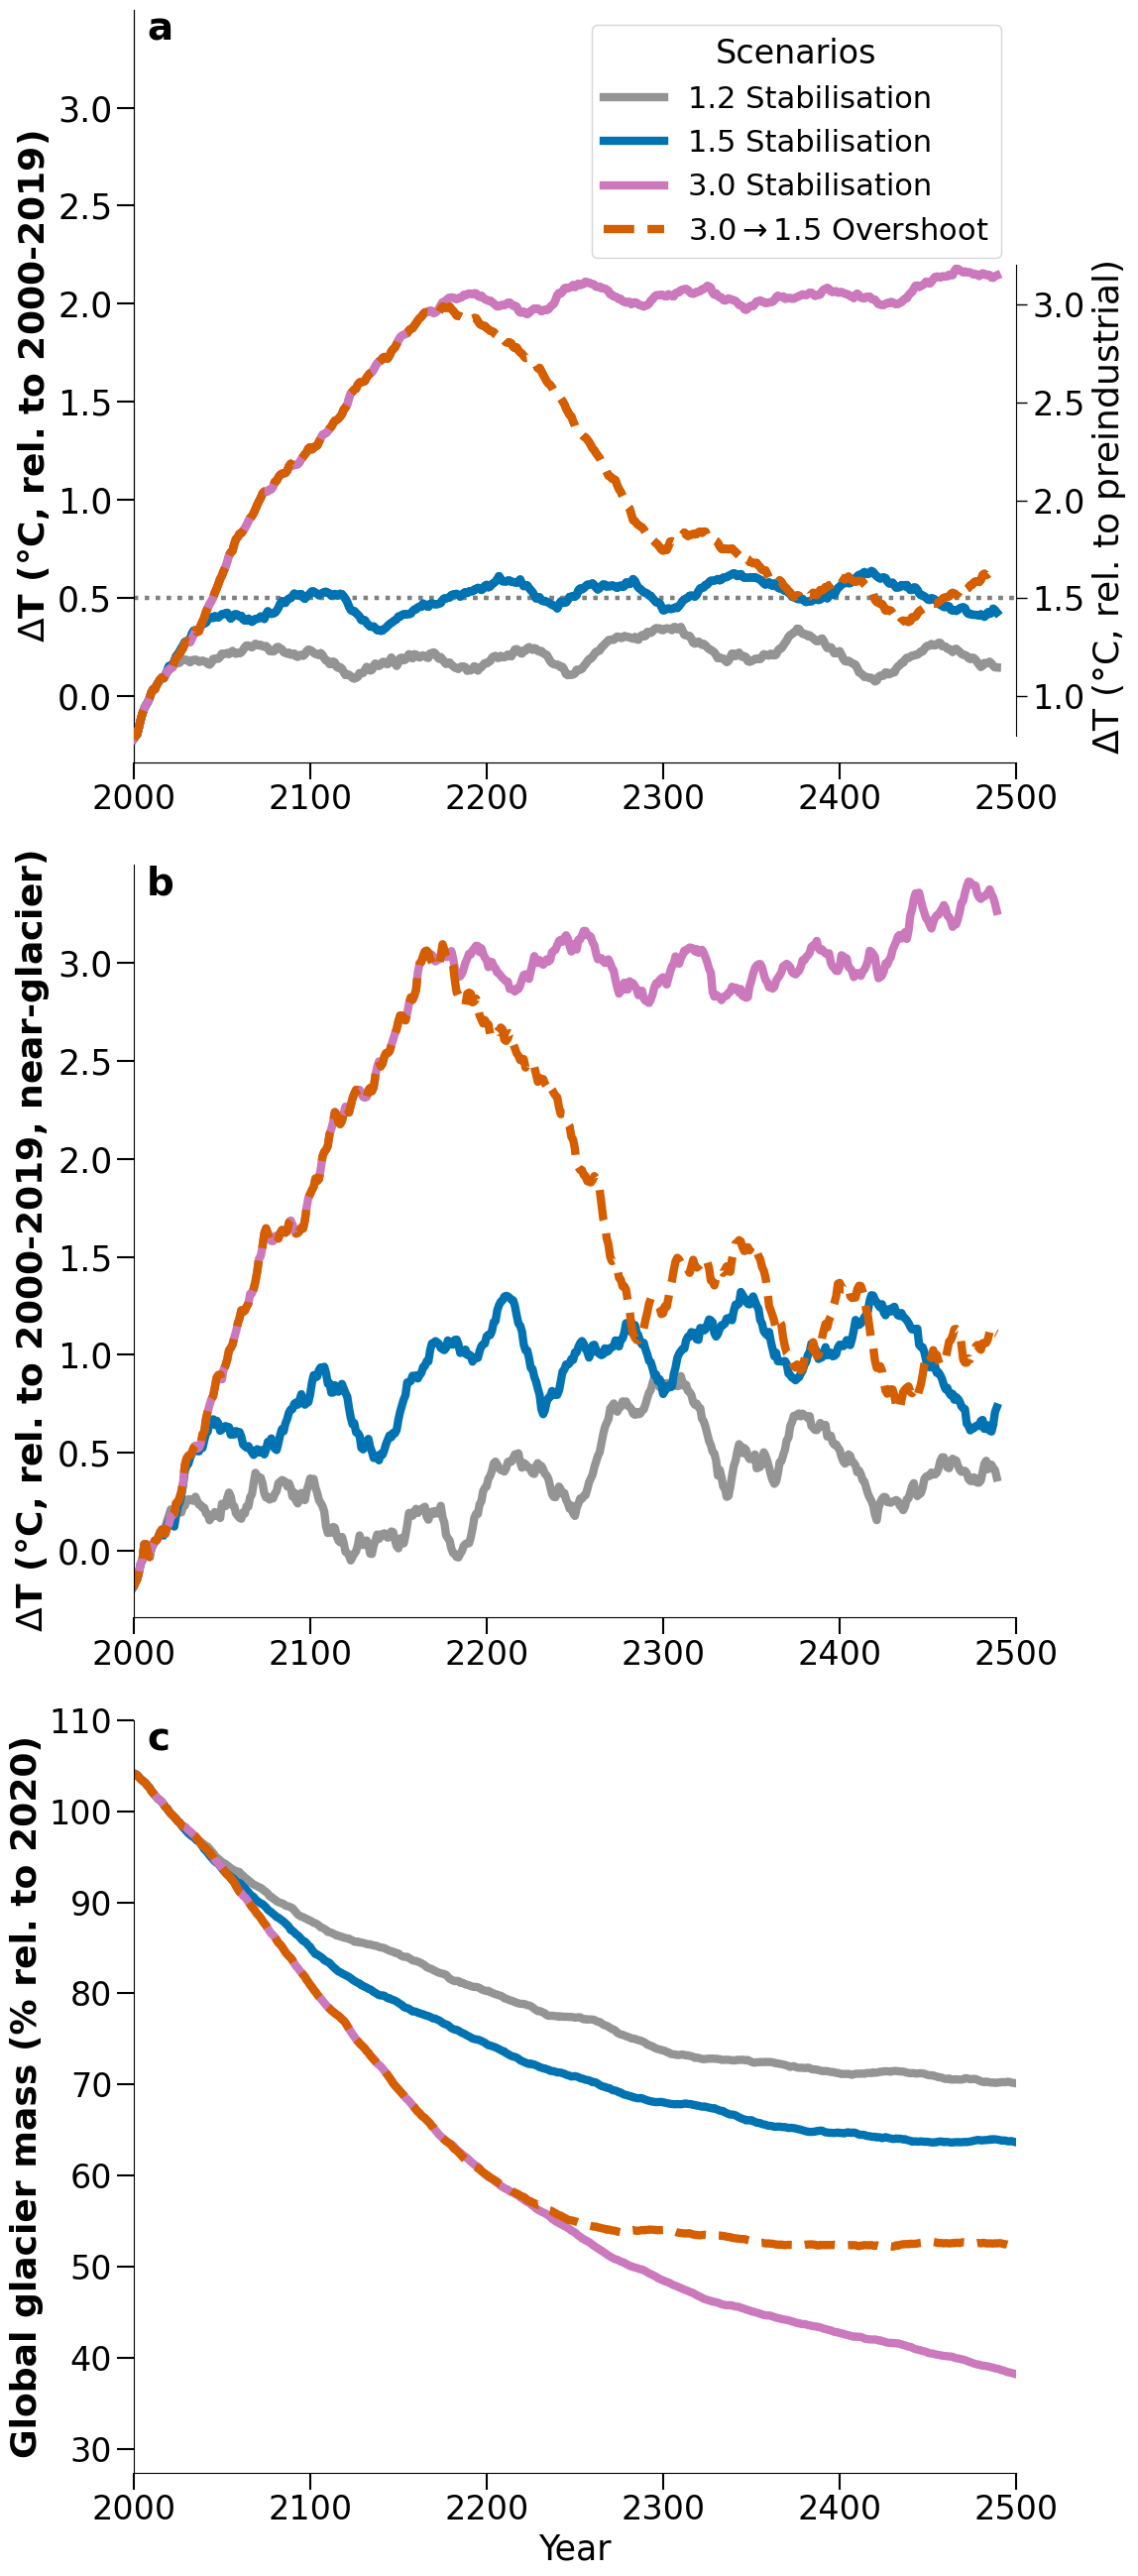

In [81]:
### 3-row version

plt.rc('font', size=24)
fs = 25
shift = 1.2
shift_l = 0 #-0.4

alpha = 1
for a,c_scenarios in zip([#'_all', 
                        '_poster_iugg'],
                        #,
                        #'_all_overshoots'],
                       [#color_scenario.keys(),
                        color_scenario_poster
                       ]): #color_scenario_all_oversh]): #'commitment run (2000-2019)',
    scenarios = c_scenarios.keys()
    for j,var in enumerate(['temp_21yr_avg',
                            #'precip_20yr_avg'
                           ]):
        fig, axs = plt.subplots(3,1, figsize=(12,26.5))
        #####################
        ax = axs[0] #[0]
        ax_r = ax.twinx()
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            pd_clim_scenario_g_ref = pd_clim_scenario_g.loc[1986:2005]['temp'].mean()

            if var == 'temp_21yr_avg':
                var_g_to_ref = pd_clim_scenario_g[var]- pd_clim_scenario_g_ref + 0.69
                #var_g_to_ref = pd_clim_scenario_g[var]/precip_ref_g
                if 'oversh' in scenario:
                    ls = '--'
                elif 'stab' in scenario:
                    ls = '--'
                else:
                    ls = '--'
                ax_r.plot(np.arange(2000,2500,1), #pd_clim_scenario_g.year,
                        var_g_to_ref.loc[2000:],
                        ls = scenario_ls[scenario],
                         lw=6, color = color_scenario[scenario], label=label_scenario_david[scenario], zorder=5)
                ax_r.set_xlabel('Year')
                #ax_r.set_title(scenario)
                ax_r.axhline(1.5, color = 'grey', lw = 3, ls = ':', alpha = 0.8)
                ax_r.set_yticks(ticks=[1.0,1.5,2.0, 2.5, 3.0],
                           labels=[1.0,1.5,2.0, 2.5, 3.0])   
            else:
                ax_r.set_yticks([],[])
        ylim_ax = ax_r.get_ylim()
        ax_r.set_ylim([ylim_ax[0]+shift_l, ylim_ax[1]+shift])
        # we switch left and right axis .. 
        ax2 = ax ###

        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            if var == 'temp_21yr_avg':
                var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g
            else:
                var_g_to_ref = 100*pd_clim_scenario_g[var]/precip_ref_g
            if 'oversh' in scenario:
                ls = '--'
            elif 'stab' in scenario:
                ls = '-.'
            else:
                ls = '-'
            ax2.plot(pd_clim_scenario_g.year.loc[2000:],
                     var_g_to_ref.loc[2000:], ls = scenario_ls[scenario], #ls,
                     lw=6,  #0.5,  # we actually do not want to see that one... <--- just put that to non-zero for tests ... 
                     color = color_scenario[scenario], label=label_scenario_david[scenario],
                    zorder=5)
            #ax.axhline(1.5, color = 'grey', lw = 3, ls = '--')
        ylim_ax2 = ax2.get_ylim()
        ax2.set_ylim([ylim_ax2[0]+shift_l, ylim_ax2[1]+shift])
        
        ax2.tick_params(axis='both', which='major', width=3, length=12) #width=1, length=10) #, grid_alpha =0.6)
        ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0],
                           labels=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0], alpha=1, #0.6, 
                       fontsize=fs) #-1)
        handles, labels = ax.get_legend_handles_labels()
        if a=='':
            ncol=1
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)], 
                            title='scenarios reaching +1.5°C\n(21-year average)', fontsize=22, ncol=ncol)
        else:
            ncol=2
            if a=='_all':
                fontsize=22
            else:
                fontsize=22
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)],ncol=1,
                            fontsize=22, #fontsize,
                            title = 'Scenarios',
                            #fontsize=20,
                            #title_fontsize=23,
                            #bbox_to_anchor=(0,0.96), 
                            loc='upper right', # TODO
                           ) #, title='Scenarios:')
            #for handle in handles:
            #    handle.set_linewidth(0.5)  # Set the handle linewidth
        if var != 'temp_21yr_avg':
            leg.remove()
        #ax.grid()
        ax.set_xlabel('')
        
        ax_r.set_ylabel(r'$\Delta$T'+r' (°C, rel. to preindustrial)                      ', fontsize=fs+1)

        ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019)', alpha=1, fontsize=fs+1, weight='bold')

        ax.set_title('')
        plt.tight_layout()
        #ax.grid(axis='x')
        #plt.yticks(fontsize=28)
        plt.xticks(fontsize=28)

        #ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0,2.5,3.0],
        #               labels=[0.0,0.5,1.0,1.5,2.0,2.5,3.0], alpha=0.6) #, fontsize=fs)
        
        #ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)
        #ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0],
        #                   labels=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0], alpha=0.6,fontsize=fs-1)   #, fontsize=fs
        #ax2.set_ylim([-0.9,5.9]);
        # ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019, glacier-area weighted)', alpha =0.6, fontsize = fs);
        #ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019)', alpha =0.6, fontsize=fs)

        #ax2.axhline(-1, alpha=0)
        #ax2.axhline(3.7, alpha=0)
        #ax2.set_ylim(ylim_ax2)
        #ax2.set_ylim(ylim_ax2) # 
        
                

        # Remove the top spine
        #sns.despine(ax=ax2, top=True, right=False, left=False, bottom=False, offset=None, trim=False)

        # Manually trim only the right spine
        #ax2.spines['right'].set_visible(True)
        #ax2.spines['right'].set_bounds(ax2.get_ylim())

        # Optional: to avoid trimming left and bottom spines, ensure they are not trimmed explicitly
        #ax2.spines['left'].set_visible(True)
        #ax2.spines['bottom'].set_visible(True)
        #ax2.spines['left'].set_position(('outward', 10)) 
        ylim_l = ax2.get_ylim()
        ###########
        ax = axs[1]
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global_glacier']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g

            ax.plot(pd_clim_scenario_g.year,
                     var_g_to_ref,
                     alpha = 1, #0.8, 
                     ls = scenario_ls[scenario],
                     lw=6, color = color_scenario[scenario], label=label_scenario_david[scenario])
        ax.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019, near-glacier)', alpha=1, fontsize=fs+1, weight='bold')
        ax.set_ylim([ylim_l[0], ylim_l[1]])
        ax.tick_params(axis='both', which='major', width=3, length=12) #width=1, length=10) #, grid_alpha =0.6)
        ax.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0],
                           labels=[0.0,0.5,1.0,1.5,2.0, 2.5, 3.0], alpha=1, #0.6, 
                       fontsize=fs) #-1)
        #handles, labels = ax.get_legend_handles_labels()
        #handles_2, labels_2 = ax2.get_legend_handles_labels()
        #######################
        # volume plot
        #####
        ax = axs[2]
        color_scenarios = c_scenarios #.keys()) #color_scenario_manuscript
        for alpha in [0,1]: # 0
            if alpha == 0:
                lw_temp =3
            else:
                lw_temp = 1
            scenarios = color_scenarios.keys()
            paletti = list(color_scenarios.values())     
            #fig, ax = plt.subplots(1,1, figsize=(16,10), sharex=True)
            pd_vol_scenario_rel = (100*df_scenario/df_scenario.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()
            df_scenario_glob = df_scenario.sum(dim='rgi_reg')
            pd_vol_scenario_glob = (100*df_scenario_glob/df_scenario_glob.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()

            ax.set_ylabel('Global glacier mass (% rel. to 2020)', weight='bold',alpha = 1, fontsize=fs+1)
            # stabilisation scenarios with ls = '-'
            sns.lineplot(data=pd_vol_scenario_glob.loc[(pd_vol_scenario_glob.bias_correction==bc) & (pd_vol_scenario_glob.scenario != 'oversh_T30OS15')],
                         hue='scenario', x='time', y= 'volume_rel_2020_%', 
                         alpha = alpha,
                         palette=stabs_col,
                         hue_order=stabs,lw=6, legend=False,
                         ax = ax)
            # overshoot with '--'
            sns.lineplot(data=pd_vol_scenario_glob.loc[(pd_vol_scenario_glob.bias_correction==bc) & (pd_vol_scenario_glob.scenario == 'oversh_T30OS15')],
                         #hue='scenario',
                         x='time', y= 'volume_rel_2020_%', 
                         alpha = alpha,
                         color=color_scenario_poster['oversh_T30OS15'],
                         hue_order=['oversh_T30OS15'],lw=6, 
                         ls = '--',
                         legend=False,
                         ax = ax)
            ax.set_xlabel('Year',  #weight='bold','
                          fontsize= fs)
            ax.tick_params(axis='both', which='major', width=2, length=10)
            ax.set_yticks(ticks=ax.get_yticks(), alpha=alpha)
            ax.grid(axis='x')
            ax.axhline(31, alpha=0)

            #plt.ylim([-2,122]);
            #plt.tight_layout()

            ### add legends
            #handles, labels = ax.get_legend_handles_labels()
            #ax.get_legend().remove()
            #ax.legend(handles, labels, loc = 'upper right', fontsize=20)

        num_text_x = 0.015
        num_text_y = 0.96
        for j,axi in enumerate(axs):
            axi.text(num_text_x, num_text_y,
                     num_dict[j], fontsize=28, transform=axi.transAxes, zorder=10, weight='bold')
            axi.set_xlim([2000,2500])
            axi.set_xlabel('')
            axi.tick_params(axis='both', which='major', width=1.5, length=12)
            sns.despine(ax=axi, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
        
        #sns.despine(ax=ax_r, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
        # Remove the top spine
        sns.despine(ax=ax_r, top=True, right=False, left=False, bottom=False, offset=None, trim=False)
        ax_r.tick_params(axis='y', which='major', width=1, length=8)

        ax_r.spines['right'].set_bounds([0.8, 3.2])

        # Manually trim only the right spine
        #ax2.spines['right'].set_visible(True)
        #ax2.spines['right'].set_bounds(ax2.get_ylim())

        # Optional: to avoid trimming left and bottom spines, ensure they are not trimmed explicitly
        #ax2.spines['left'].set_visible(True)
        #ax2.spines['bottom'].set_visible(True)
        #ax2.spines['left'].set_position(('outward', 10)) 

        ax.set_xlabel('Year')

        #ax2.yticks(fontsize=26)

        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.pdf')
        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.png')
        plt.tight_layout()
        plt.savefig(f'figures/fig_2_temp_vol_glob{a}_{alpha}_one_column_v_3_rows.pdf')
        plt.savefig(f'figures/fig_2_temp_vol_glob{a}_{alpha}_one_column_v_3_rows.png', dpi=300)

In [52]:
# in 2100 ... 
pd_vol_scenario_glob_2100 = pd_vol_scenario_glob.loc[pd_vol_scenario_glob.time==2100]
pd_vol_scenario_glob_2100

bias_correction        scenario         gcm    time  calendar_month  \
100     bc_1980_2019  oversh_T20OS15  GFDL-ESM2M  2100.0               1   
600     bc_1980_2019  oversh_T25OS15  GFDL-ESM2M  2100.0               1   
1100    bc_1980_2019  oversh_T30OS15  GFDL-ESM2M  2100.0               1   
1600    bc_1980_2019        stab_T12  GFDL-ESM2M  2100.0               1   
2100    bc_1980_2019        stab_T15  GFDL-ESM2M  2100.0               1   
2600    bc_1980_2019        stab_T20  GFDL-ESM2M  2100.0               1   
3100    bc_1980_2019        stab_T25  GFDL-ESM2M  2100.0               1   
3600    bc_1980_2019        stab_T30  GFDL-ESM2M  2100.0               1   

                OGGM_version  volume_rel_2020_%  
100   OGGM_v161_gdirs_2023.3          83.701508  
600   OGGM_v161_gdirs_2023.3          80.866661  
1100  OGGM_v161_gdirs_2023.3          80.931824  
1600  OGGM_v161_gdirs_2023.3          88.007301  
2100  OGGM_v161_gdirs_2023.3          85.112030  
2600  OGGM_v161_gdirs_2023.3          83.710205  
3100  OGGM_v161_gdirs_2023.3          80.870148  
3600  OGGM_v161_gdirs_2023.3          80.935158

In [53]:
# maximum volume difference
years = np.sort(np.array(list(set(pd_vol_scenario_glob.time.values))).astype(int))
pd_diff = pd.DataFrame(index = years)
for y in years:
    sel = pd_vol_scenario_glob.loc[pd_vol_scenario_glob.time==y]
    diff = sel.loc[sel.scenario == 'stab_T15']['volume_rel_2020_%'].values - sel.loc[sel.scenario == 'oversh_T30OS15']['volume_rel_2020_%'].values
    pd_diff.loc[y,'diff'] = diff
pd_diff.max(), pd_diff.idxmax()

(diff    15.95742
 dtype: float32,
 diff    2252
 dtype: int64)

In [54]:
pd_diff.loc[2100]

diff    4.180206
Name: 2100, dtype: float32

In [55]:
pd_diff.loc[2300]

diff    14.013756
Name: 2300, dtype: float32

In [56]:
# in 2500 ... 
pd_vol_scenario_glob_2499 = pd_vol_scenario_glob.loc[pd_vol_scenario_glob.time==2499]
pd_vol_scenario_glob_2499

bias_correction        scenario         gcm    time  calendar_month  \
499     bc_1980_2019  oversh_T20OS15  GFDL-ESM2M  2499.0               1   
999     bc_1980_2019  oversh_T25OS15  GFDL-ESM2M  2499.0               1   
1499    bc_1980_2019  oversh_T30OS15  GFDL-ESM2M  2499.0               1   
1999    bc_1980_2019        stab_T12  GFDL-ESM2M  2499.0               1   
2499    bc_1980_2019        stab_T15  GFDL-ESM2M  2499.0               1   
2999    bc_1980_2019        stab_T20  GFDL-ESM2M  2499.0               1   
3499    bc_1980_2019        stab_T25  GFDL-ESM2M  2499.0               1   
3999    bc_1980_2019        stab_T30  GFDL-ESM2M  2499.0               1   

                OGGM_version  volume_rel_2020_%  
499   OGGM_v161_gdirs_2023.3          60.645912  
999   OGGM_v161_gdirs_2023.3          54.403374  
1499  OGGM_v161_gdirs_2023.3          52.400211  
1999  OGGM_v161_gdirs_2023.3          70.151115  
2499  OGGM_v161_gdirs_2023.3          63.693211  
2999  OGGM_v161_gdirs_2023.3          53.363018  
3499  OGGM_v161_gdirs_2023.3          44.605919  
3999  OGGM_v161_gdirs_2023.3          38.224457

In [57]:
pd_vol_scenario_glob_2499.loc[pd_vol_scenario_glob_2499.scenario =='stab_T15']['volume_rel_2020_%'].values - pd_vol_scenario_glob_2499.loc[pd_vol_scenario_glob_2499.scenario =='oversh_T30OS15']['volume_rel_2020_%'].values

array([11.292999], dtype=float32)

*Same stats with the common running glaciers (that also run for 4000 years...)*

In [58]:
df_scenario_random_ss = xr.open_dataset(f'common_running_of_random_runs_sum_all_provide_reg_oversh_stab_2000_2500_bc_1980_2019.nc').volume#
# this is for the year 2499
100*df_scenario_random_ss.sel(provide_region='P13').isel(time=-1)/df_scenario_random_ss.sel(provide_region='P13').sel(time=2020)

<xarray.DataArray 'volume' (bias_correction: 1, scenario: 2, gcm: 1)>
array([[[59.64885],
        [43.4638 ]]], dtype=float32)
Coordinates:
    hydro_month      int64 10
    calendar_month   int64 1
  * gcm              (gcm) object 'GFDL-ESM2M'
  * scenario         (scenario) object 'stab_T15' 'oversh_T30OS15'
  * bias_correction  (bias_correction) object 'bc_1980_2019'
    provide_region   <U3 'P13'
    OGGM_version     <U22 'OGGM_v161_gdirs_2023.3'

In [59]:
df_scenario_random_ss.sel(provide_region='P13').sel(time=2020)

<xarray.DataArray 'volume' (bias_correction: 1, scenario: 2, gcm: 1)>
array([[[4.163772e+13],
        [4.163772e+13]]], dtype=float32)
Coordinates:
    time             float64 2.02e+03
    hydro_year       int64 ...
    hydro_month      int64 ...
    calendar_year    int64 ...
    calendar_month   int64 ...
  * gcm              (gcm) object 'GFDL-ESM2M'
  * scenario         (scenario) object 'stab_T15' 'oversh_T30OS15'
  * bias_correction  (bias_correction) object 'bc_1980_2019'
    provide_region   <U3 'P13'
    OGGM_version     object ...

In [60]:
df_scenario.sel(rgi_reg='19').volume.sel(time=2020).sel(scenario=['stab_T15', 'oversh_T30OS15'])

<xarray.DataArray 'volume' (bias_correction: 1, scenario: 2, gcm: 1)>
array([[[4.470808e+13],
        [4.471039e+13]]], dtype=float32)
Coordinates:
    time             float64 2.02e+03
    hydro_year       int64 ...
    hydro_month      int64 ...
    calendar_year    int64 ...
    calendar_month   int64 ...
  * gcm              (gcm) object 'GFDL-ESM2M'
  * scenario         (scenario) object 'stab_T15' 'oversh_T30OS15'
  * bias_correction  (bias_correction) object 'bc_1980_2019'
    OGGM_version     object ...
    rgi_reg          <U2 '19'

In [61]:
(100*df_scenario.sel(rgi_reg='19').volume.isel(time=-1)/df_scenario.sel(rgi_reg='19').volume.sel(time=2020)).sel(scenario=['stab_T15', 'oversh_T30OS15'])

<xarray.DataArray 'volume' (bias_correction: 1, scenario: 2, gcm: 1)>
array([[[64.96744 ],
        [47.491577]]], dtype=float32)
Coordinates:
    hydro_month      int64 10
    calendar_month   int64 1
  * gcm              (gcm) object 'GFDL-ESM2M'
  * scenario         (scenario) object 'stab_T15' 'oversh_T30OS15'
  * bias_correction  (bias_correction) object 'bc_1980_2019'
    OGGM_version     <U22 'OGGM_v161_gdirs_2023.3'
    rgi_reg          <U2 '19'

In [62]:
df_scenario_random_ss = xr.open_dataset(f'common_running_of_random_runs_sum_all_provide_reg_oversh_stab_2000_2500_bc_1980_2019.nc').volume#
# this is for the year 2499
100*df_scenario_random_ss.sum(dim='provide_region').isel(time=-1)/df_scenario_random_ss.sum(dim='provide_region').sel(time=2020)

<xarray.DataArray 'volume' (bias_correction: 1, scenario: 2, gcm: 1)>
array([[[58.963833],
        [48.5904  ]]], dtype=float32)
Coordinates:
    calendar_month   int64 1
  * gcm              (gcm) object 'GFDL-ESM2M'
  * scenario         (scenario) object 'stab_T15' 'oversh_T30OS15'
  * bias_correction  (bias_correction) object 'bc_1980_2019'
    OGGM_version     <U22 'OGGM_v161_gdirs_2023.3'

*Conclusion*:  The additional failing glacier area when running over a longer time period comes specifically from regions 07, 08, 09 and 19. This explains that when only looking at the common running glaciers from the long steady-state runs, the discrepancies in the year 2499 are 10.4%, while they are 11.3% when using more common running glaciers (the common running glaciers until 2499)... 

**Things changed after discussion with co-authors**
- change it to columns instead of rows
- put the glacier-area weighted temperature with thin lines into panel a 
- that means panel b only shows the volume projections

### Supplementary figure of precipitation changes... 

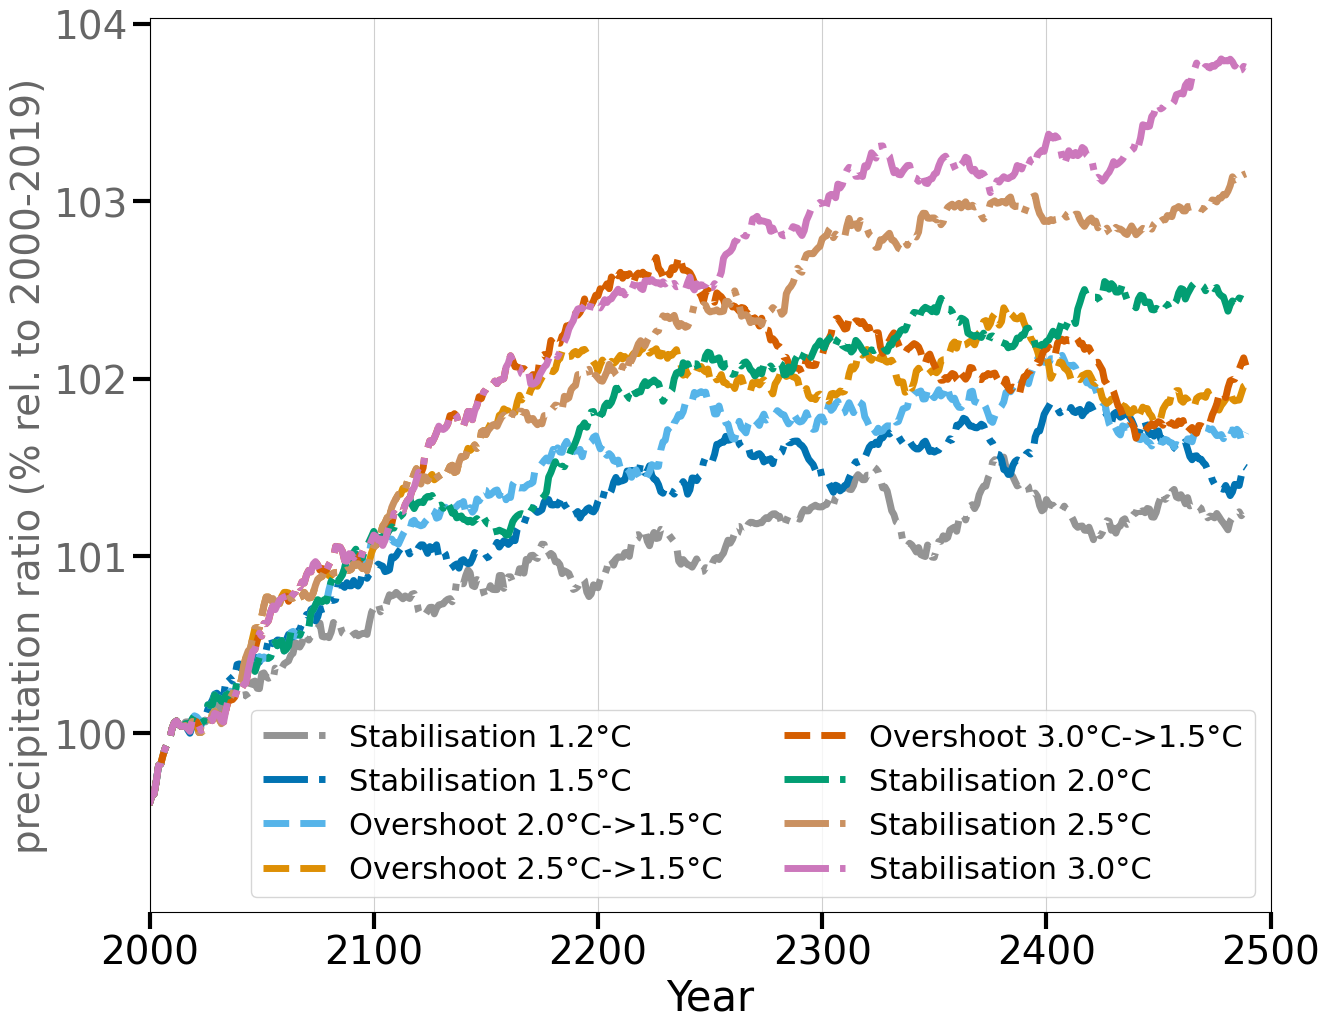

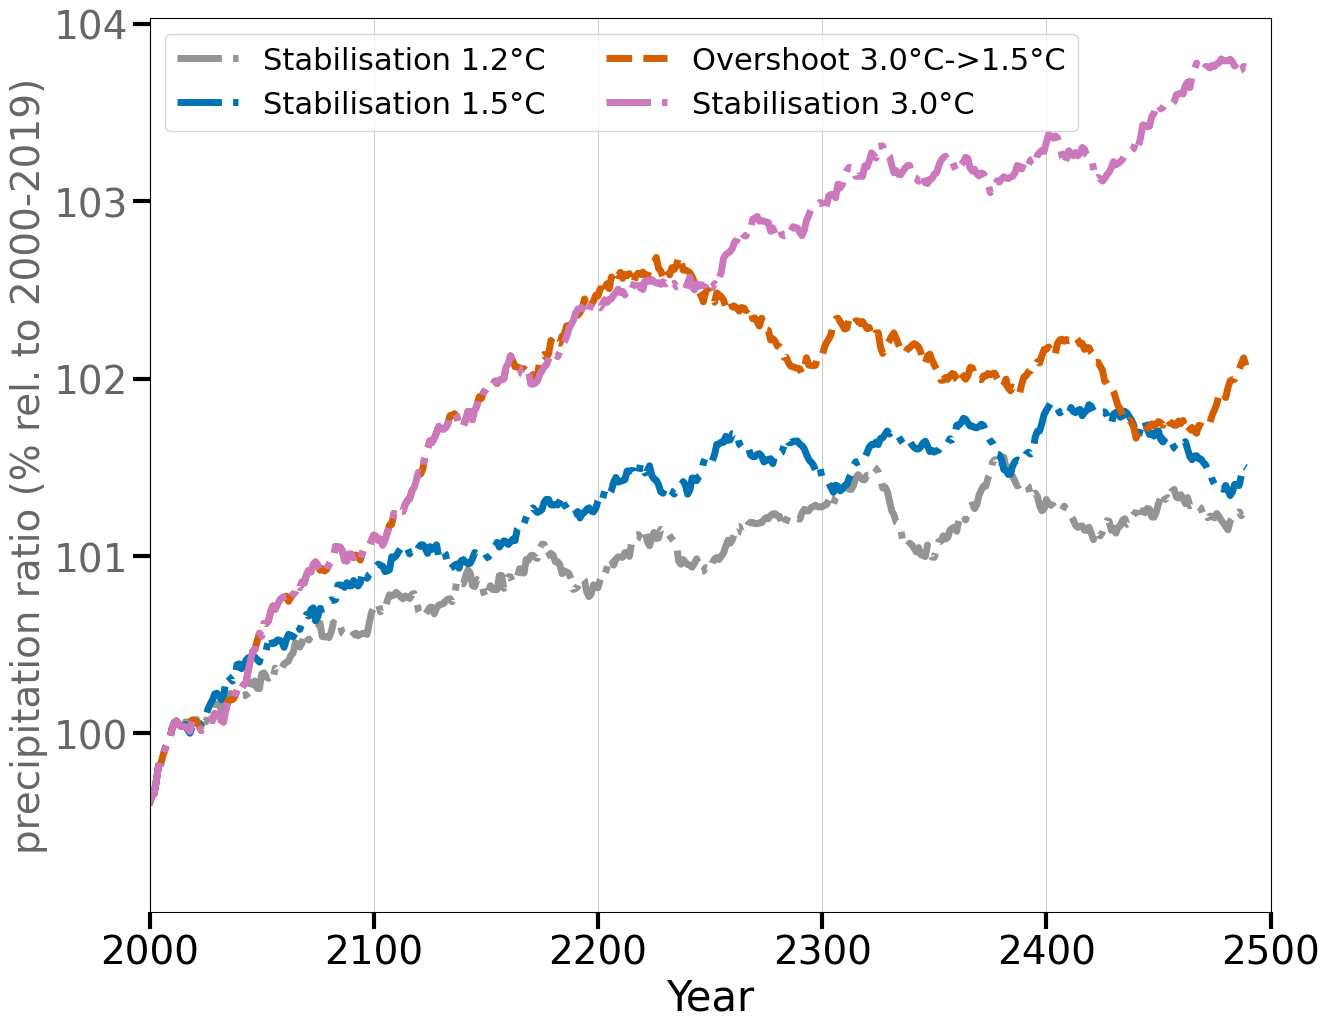

In [63]:
plt.rc('font', size=30)
for a,scenarios in zip(['_all', '_poster_iugg', '_all_overshoots'],
                       [color_scenario.keys(),
                        color_scenario_poster.keys(), 
                        ]): #'commitment run (2000-2019)',
        
    for j,var in enumerate(['precip_21yr_avg']):
        fig, axs = plt.subplots(1,1, figsize=(14,11))

        #####################
        ax = axs #[0]

        ax2 = ax # .twinx()    
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()

            var_g_to_ref = 100*pd_clim_scenario_g[var]/precip_ref_g
            if 'oversh' in scenario:
                ls = '--'
            elif 'stab' in scenario:
                ls = '-.'
            else:
                ls = '-'
            ax2.plot(pd_clim_scenario_g.year,
                     var_g_to_ref, ls = ls,
                     lw=5, color = color_scenario[scenario], label=label_scenario[scenario])
            #ax.axhline(1.5, color = 'grey', lw = 3, ls = '--')

        ax2.set_yticks(ticks=[100, 101, 102,103,104],
                           labels=[100, 101, 102,103,104], alpha=0.6)   
        ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)

        handles, labels = ax.get_legend_handles_labels()
        if a=='':
            ncol=1
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)], title='scenarios reaching +1.5°C\n(20-year average)', ncol=ncol)

        else:
            ncol=2
            if a=='_all':
                fontsize=22
            else:
                fontsize=22
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)],ncol=ncol, fontsize=fontsize) #, title='Scenarios:')
            #for handle in handles:
            #    handle.set_linewidth(0.5)  # Set the handle linewidth
        #if var != 'temp_20yr_avg':
        #leg.remove()
        #ax.grid()
        ax.set_xlabel('Year')
 
        #ax.set_ylabel(r'precipitation ratio (relative to preindustrial levels)', weight='bold')
        ax2.set_ylabel(r'precipitation ratio (% rel. to 2000-2019)', alpha =0.6,fontsize=28)
        #ax.set_title(r'Global precipitation changes')
        ax.set_title('')
        plt.tight_layout()
        plt.xlim([2000,2500])
        ax.grid(axis='x')
        ax.tick_params(axis='both', which='major', width=3, length=12)
        plt.yticks(fontsize=28)
        plt.xticks(fontsize=28)

        #ax2.yticks(fontsize=26)

        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.pdf')
        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.png')
        plt.tight_layout()
        #plt.savefig(f'1_global_clim{a}_{var}.pdf')
        plt.savefig(f'figures/1_global_clim{a}_{var}.png', dpi=300)

# **Old**

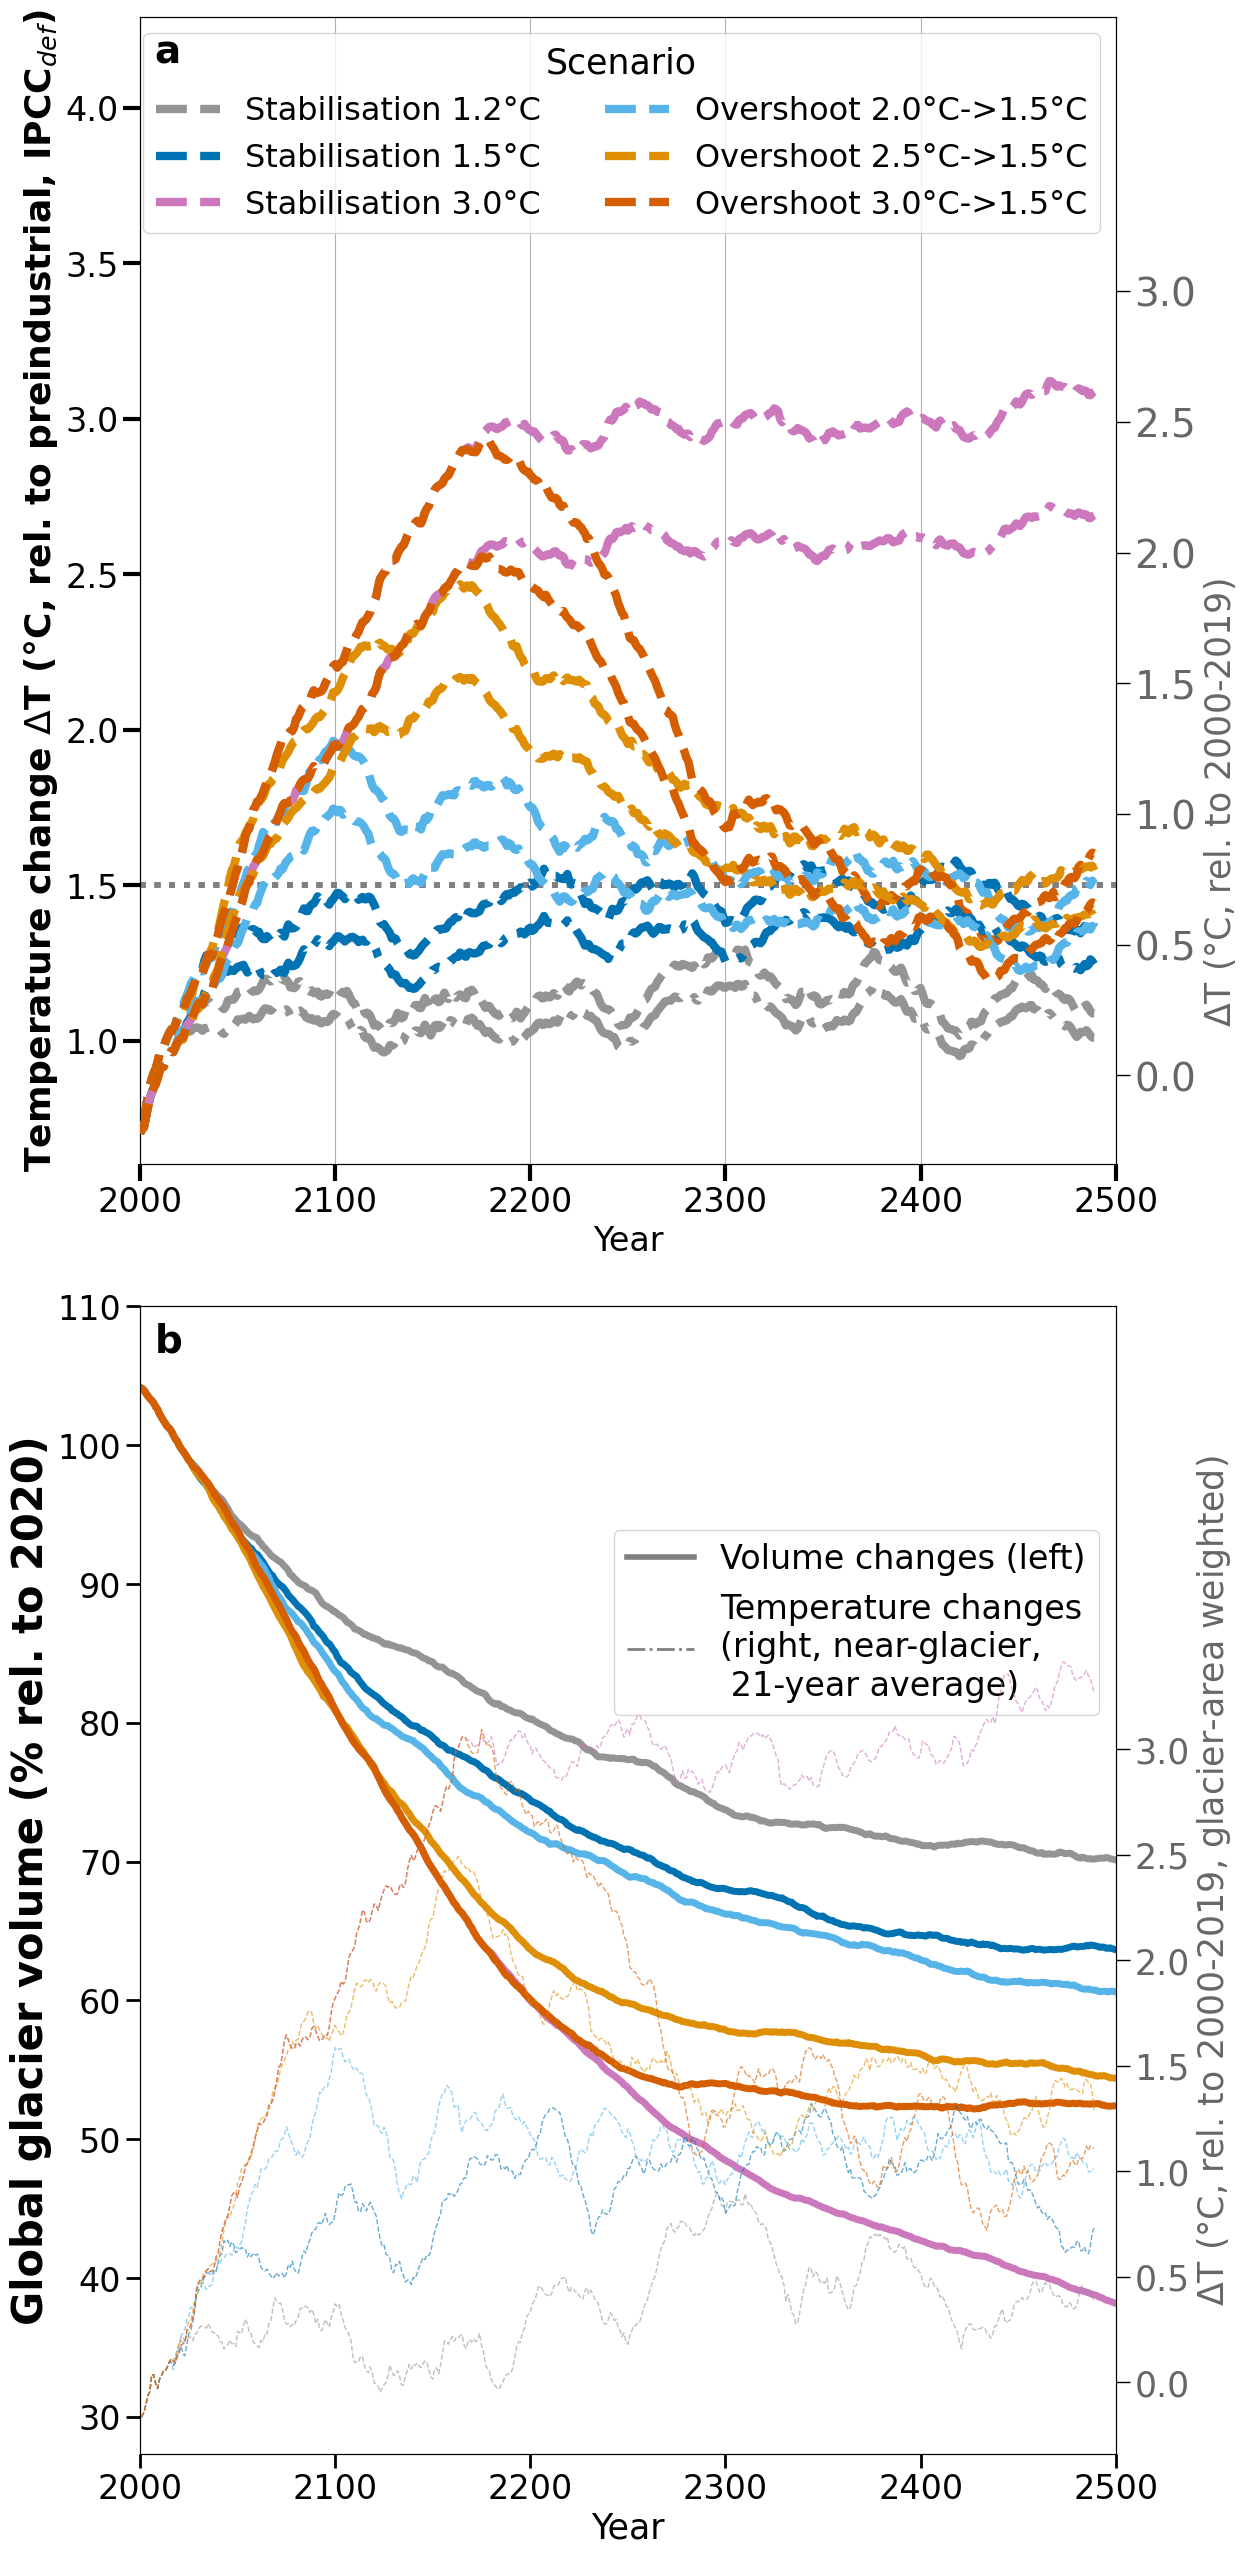

In [17]:
plt.rc('font', size=24)
fs = 25
shift = 1.05
for a,c_scenarios in zip([#'_all', 
                        #'_poster_iugg',
                        '_all_overshoots'],
                       [#color_scenario.keys(),
                        #color_scenario_poster, 
                        color_scenario_all_oversh]): #'commitment run (2000-2019)',
    scenarios = c_scenarios.keys()
    for j,var in enumerate(['temp_21yr_avg',
                            #'precip_20yr_avg'
                           ]):
        fig, axs = plt.subplots(2,1, figsize=(13,26))

        #####################
        ax = axs[0] #[0]
        for reg, lw in zip(['global',
                            #'global_glacier'
                           ],
                           [6,
                           # 1
                           ]): 
            for scenario in scenarios:
                pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
                pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == reg]
                pd_clim_scenario_g.index = pd_clim_scenario_g.year
                pd_clim_scenario_g_ref = pd_clim_scenario_g.loc[1986:2005]['temp'].mean()

                if var == 'temp_21yr_avg':
                    var_g_to_ref = pd_clim_scenario_g[var]- pd_clim_scenario_g_ref + 0.69
                    #var_g_to_ref = pd_clim_scenario_g[var]/precip_ref_g
                    if 'oversh' in scenario:
                        ls = '--'
                    elif 'stab' in scenario:
                        ls = '--'
                    else:
                        ls = '--'
                    ax.plot(np.arange(2000,2500,1), #pd_clim_scenario_g.year,
                            var_g_to_ref.loc[2000:],
                            ls = ls,
                             lw=lw, color = color_scenario[scenario], label=label_scenario[scenario], zorder=5)
                    ax.set_xlabel('Year')
                    ax.set_title(scenario)
                    ax.axhline(1.5, color = 'grey', lw = 4, ls = ':') 

        else:
            ax.set_yticks([],[])
        ylim_ax = ax.get_ylim()
 
        ax.set_yticks(ticks=[1.0,1.5,2.0, 2.5, 3.0, 3.5,4.0],
                   labels=[1.0,1.5,2.0, 2.5, 3.0, 3.5, 4.0])  
        ax.set_ylim([ylim_ax[0], ylim_ax[1]+shift])

        ax2 = ax.twinx()  
        for reg, lw in zip(['global',
                            #'global_glacier'
                           ],
                           [6,
                           # 1
                           ]): 

            for scenario in scenarios:
                            #'stab_T30']:

                pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
                pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == reg]
                pd_clim_scenario_g.index = pd_clim_scenario_g.year
                temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
                if var == 'temp_21yr_avg':
                    var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g
                else:
                    var_g_to_ref = 100*pd_clim_scenario_g[var]/precip_ref_g
                if 'oversh' in scenario:
                    ls = '--'
                elif 'stab' in scenario:
                    ls = '-.'
                else:
                    ls = '-'
                ax2.plot(pd_clim_scenario_g.year.loc[2000:],
                         var_g_to_ref.loc[2000:], ls = ls,
                         lw=lw, color = color_scenario[scenario], label=label_scenario[scenario],
                        zorder=5)
                #ax.axhline(1.5, color = 'grey', lw = 3, ls = '--')
            if var == 'temp_21yr_avg':
                ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0, 2.5,3.0],
                               labels=[0.0,0.5,1.0,1.5,2.0, 2.5,3.0], alpha=0.6, fontsize=fs)   
            else:
                ax2.set_yticks(ticks=[100, 101, 102,103,104],
                               labels=[100, 101, 102,103,104], alpha=0.6, fontsize=fs)   
            ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)

        ylim_ax2 = ax2.get_ylim()
        ax2.set_ylim([ylim_ax2[0], ylim_ax2[1]+shift]) # 
        
        handles, labels = ax.get_legend_handles_labels()
        if a=='':
            ncol=1
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)],
                            title='scenarios reaching +1.5°C\n(21-year average)', ncol=ncol)
        else:
            ncol=2
            if a=='_all':
                fontsize=22
            else:
                fontsize=22
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)],ncol=2,
                            fontsize=23, #fontsize,
                            title = 'Scenario',
                            #fontsize=20,
                            title_fontsize=25,
                            bbox_to_anchor=(1,1), loc='upper right', # TODO
                           ) #, title='Scenarios:')
            #for handle in handles:
            #    handle.set_linewidth(0.5)  # Set the handle linewidth
        if var != 'temp_21yr_avg':
            leg.remove()
        #ax.grid()
        ax.set_xlabel('Year')
        if var == 'temp_21yr_avg':
            #ax.set_ylabel(r'$\Delta$T'+r'(°C) (rel. to preindustrial, IPCC$_{def}$)', weight='bold', fontsize=fs+3)
            ax.set_ylabel(r'Temperature change $\Delta$T'+r' (°C, rel. to preindustrial, IPCC$_{def}$)',
                          weight='bold', fontsize=fs+1)

            ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019)                                       ',
                           alpha =0.6, fontsize=fs)
            #ax.set_title(r'Global temperature changes ($\Delta$T, 20-year average)', fontsize=32)
            #ax.set_ylim([0,3.2])
        else:
            #ax.set_ylabel(r'precipitation ratio (relative to preindustrial levels)', weight='bold')
            ax2.set_ylabel(r'precipitation ratio (%, relative to 2000-2019)', alpha =0.6,fontsize=fs)
            #ax.set_title(r'Global precipitation changes')
        ax.set_title('')
        plt.tight_layout()
        plt.xlim([2000,2500])
        ax.grid(axis='x')
        ax.tick_params(axis='both', which='major', width=3, length=12)
        plt.yticks(fontsize=28)
        plt.xticks(fontsize=28)
        ylim_ax2 = ax2.get_ylim()

        handles_2, labels_2 = ax2.get_legend_handles_labels()

        #if alpha !=0:
        
        #leg2 = ax.legend([handles[0], handles_2[0]], ['Global mean',
        #                                              f'Near-glacier area-weighted'],
        #                 loc='upper right', ncol=1, fontsize=24, title='Temperature change (21-year average)',
        #                 bbox_to_anchor=(1,0.82),
        #                )
        #leg2.get_lines()[0].set_linewidth(4)
        #leg2.get_lines()[1].set_linewidth(2)
        #for l in leg2.get_lines():
        #    l.set_color('grey')
        
        ##################
        # volume plot
        
        #####
        ax = axs[1]
        color_scenarios = c_scenarios #.keys()) #color_scenario_manuscript
        for alpha in [0,1]: # 0
            if alpha == 0:
                lw_temp =3
            else:
                lw_temp = 1
            scenarios = color_scenarios.keys()
            paletti = list(color_scenarios.values())     
            #fig, ax = plt.subplots(1,1, figsize=(16,10), sharex=True)
            pd_vol_scenario_rel = (100*df_scenario/df_scenario.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()
            df_scenario_glob = df_scenario.sum(dim='rgi_reg')
            pd_vol_scenario_glob = (100*df_scenario_glob/df_scenario_glob.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()

            ax.set_ylabel('Global glacier volume (% rel. to 2020)', weight='bold',alpha = alpha, fontsize=fs+5)

            sns.lineplot(data=pd_vol_scenario_glob.loc[pd_vol_scenario_glob.bias_correction==bc],
                         hue='scenario', x='time', y= 'volume_rel_2020_%', 
                         alpha = alpha,
                         palette=paletti,
                         hue_order=scenarios,lw=5, legend=True,
                         ax = ax)
            ax.set_xlabel('Year',  #weight='bold',
                          fontsize= fs)
            ax.tick_params(axis='both', which='major', width=2, length=10)
            ax.set_yticks(ticks=ax.get_yticks(), alpha=alpha)
            ax.grid(axis='x')
            ax.axhline(31, alpha=0)
            
            #plt.ylim([-2,122]);
            plt.tight_layout()

            ### add legends
            handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()
            if a == '_poster_iugg':
                leg = ax.legend(handles[:len(scenarios)], labels_2[:len(scenarios)], title='Scenarios',
                                fontsize=20, title_fontsize=22, bbox_to_anchor=(1,0.82), loc='upper right')
            else:
                leg = ax.legend(handles[:len(scenarios)], labels_2[:len(scenarios)], title='Scenarios',
                                fontsize=20, title_fontsize=22, #bbox_to_anchor=(1,1),
                                loc='lower center', ncol=2)
            for l in leg.get_lines():
                l.set_linewidth(4)
            leg.remove()

            #ax.add_artist(leg)
            #if a == '_poster_iugg':
            #    pass
            #    ax.text(0.98,0.98, 'Globally',
            #             transform=ax.transAxes,ha='right',va='top',
            #             color='grey', fontsize=24)
            #else:
            #ax.set_title('Global glacier volume evolution')

            #plt.tight_layout()
            #plt.savefig(f'2_global_glacier_volume{a}_{bc}_vol{alpha}.pdf')
            #plt.savefig(f'2_global_glacier_volume{a}_{bc}_vol{alpha}.png')
            
        ax2 = ax.twinx()  
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global_glacier']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g

            ax2.plot(pd_clim_scenario_g.year,
                     var_g_to_ref,
                     alpha = 0.6, 
                     ls = '--',
                     lw=lw_temp, color = color_scenario[scenario], label=label_scenario[scenario])
        ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0,2.5,3.0],
                       labels=[0.0,0.5,1.0,1.5,2.0,2.5,3.0], alpha=0.6, fontsize=fs)
        #ax2.set_ylim([-0.9,5.9]);
        ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019, glacier-area weighted)', alpha =0.6, fontsize = fs);
        ax2.tick_params(axis='both', which='major', width=1, length=10)
        ax2.axhline(-1, alpha=0)
        ax2.axhline(3.7, alpha=0)
        #ax2.set_ylim(ylim_ax2)
        ax2.set_ylim(ylim_ax2) # 

        if alpha !=0:
            leg2 = ax.legend([handles[0], handles_2[0]], ['Volume changes (left)',
                                                          f'Temperature changes\n(right, near-glacier,\n 21-year average)'],
                             loc='upper right', ncol=1, fontsize=24,
                             bbox_to_anchor=(1,0.82),
                            )
            leg2.get_lines()[0].set_linewidth(4)
            leg2.get_lines()[1].set_linewidth(2)
            for l in leg2.get_lines():
                l.set_color('grey')
        plt.xlim([2000,2500])

        num_text_x = 0.015
        num_text_y = 0.96
        for j,axi in enumerate(axs):
            axi.text(num_text_x, num_text_y,
                     num_dict[j], fontsize=28, transform=axi.transAxes, zorder=10, weight='bold')
        #ax2.yticks(fontsize=26)

        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.pdf')
        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.png')
        plt.tight_layout()
        plt.savefig(f'fig_2_temp_vol_glob{a}_{alpha}_one_column.pdf')
        plt.savefig(f'fig_2_temp_vol_glob{a}_{alpha}_one_column.png', dpi=300)

**Problem, globally and glacier-area weighted the changes from 1986:2005 to 2000-2019 are different!!!**

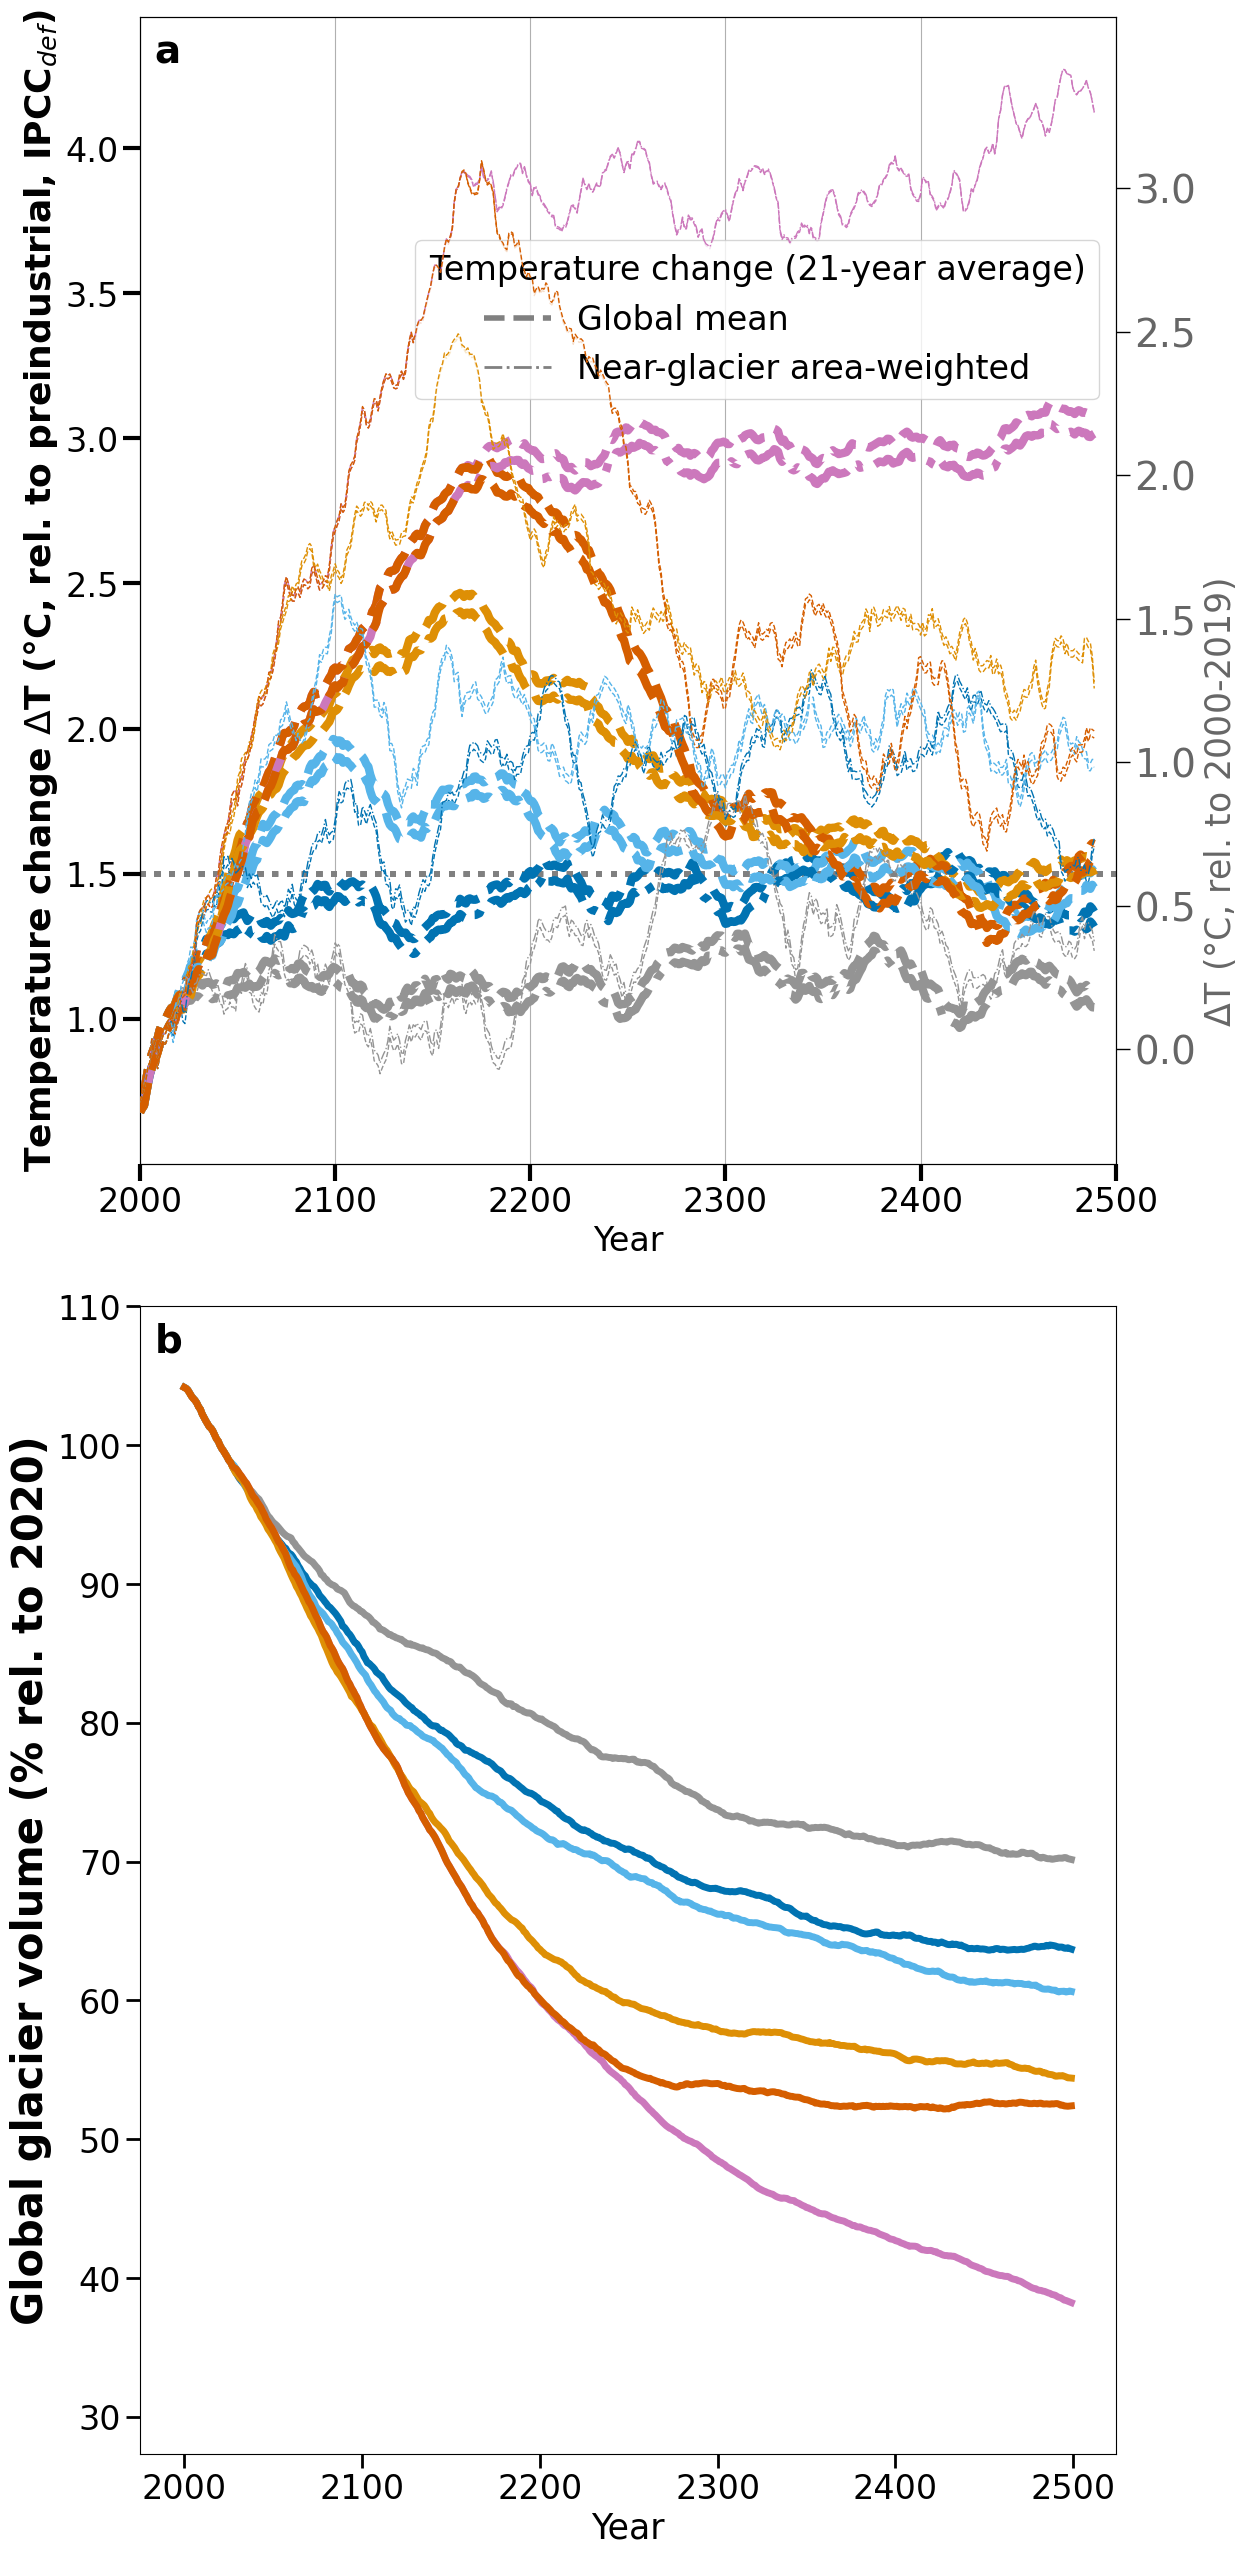

In [13]:
plt.rc('font', size=24)
fs = 25
shift = 1.05
for a,c_scenarios in zip([#'_all', 
                        #'_poster_iugg',
                        '_all_overshoots'],
                       [#color_scenario.keys(),
                        #color_scenario_poster, 
                        color_scenario_all_oversh]): #'commitment run (2000-2019)',
    scenarios = c_scenarios.keys()
    for j,var in enumerate(['temp_21yr_avg',
                            #'precip_20yr_avg'
                           ]):
        fig, axs = plt.subplots(2,1, figsize=(13,26))

        #####################
        ax = axs[0] #[0]
        for reg, lw in zip(['global','global_glacier'],[6,1]): 

            for scenario in scenarios:
                pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
                pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == reg]
                pd_clim_scenario_g.index = pd_clim_scenario_g.year
                pd_clim_scenario_g_ref = pd_clim_scenario_g.loc[1986:2005]['temp'].mean()

                if var == 'temp_21yr_avg':
                    var_g_to_ref = pd_clim_scenario_g[var]- pd_clim_scenario_g_ref + 0.69
                    #var_g_to_ref = pd_clim_scenario_g[var]/precip_ref_g
                    if 'oversh' in scenario:
                        ls = '--'
                    elif 'stab' in scenario:
                        ls = '--'
                    else:
                        ls = '--'
                    ax.plot(np.arange(2000,2500,1), #pd_clim_scenario_g.year,
                            var_g_to_ref.loc[2000:],
                            ls = ls,
                             lw=lw, color = color_scenario[scenario], label=label_scenario[scenario], zorder=5)
                    ax.set_xlabel('Year')
                    ax.set_title(scenario)
                    ax.axhline(1.5, color = 'grey', lw = 4, ls = ':') 
            if reg == 'global':
                pass 
            #ylim_ax = ax.get_ylim()

        else:
            ax.set_yticks([],[])
        ylim_ax = ax.get_ylim()
 
        ax.set_yticks(ticks=[1.0,1.5,2.0, 2.5, 3.0, 3.5,4.0],
                   labels=[1.0,1.5,2.0, 2.5, 3.0, 3.5, 4.0])  
        ax.set_ylim([ylim_ax[0], ylim_ax[1]])

        ax2 = ax.twinx()  
        for reg, lw in zip(['global','global_glacier'],[6,1]): 

            for scenario in scenarios:
                            #'stab_T30']:

                pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
                pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == reg]
                pd_clim_scenario_g.index = pd_clim_scenario_g.year
                temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
                if var == 'temp_21yr_avg':
                    var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g
                else:
                    var_g_to_ref = 100*pd_clim_scenario_g[var]/precip_ref_g
                if 'oversh' in scenario:
                    ls = '--'
                elif 'stab' in scenario:
                    ls = '-.'
                else:
                    ls = '-'
                ax2.plot(pd_clim_scenario_g.year.loc[2000:],
                         var_g_to_ref.loc[2000:], ls = ls,
                         lw=lw, color = color_scenario[scenario], label=label_scenario[scenario],
                        zorder=5)
                #ax.axhline(1.5, color = 'grey', lw = 3, ls = '--')
            if var == 'temp_21yr_avg':
                ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0, 2.5,3.0],
                               labels=[0.0,0.5,1.0,1.5,2.0, 2.5,3.0], alpha=0.6, fontsize=fs)   
            else:
                ax2.set_yticks(ticks=[100, 101, 102,103,104],
                               labels=[100, 101, 102,103,104], alpha=0.6, fontsize=fs)   
            ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)
            if reg == 'global_glacier':
                pass
                #ylim_ax2 = ax2.get_ylim()

        ylim_ax2 = ax2.get_ylim()
        ax2.set_ylim([ylim_ax2[0], ylim_ax2[1]]) # +shift
        
        handles, labels = ax.get_legend_handles_labels()
        if a=='':
            ncol=1
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)],
                            title='scenarios reaching +1.5°C\n(21-year average)', ncol=ncol)
        else:
            ncol=2
            if a=='_all':
                fontsize=22
            else:
                fontsize=22
            leg = ax.legend(handles[:len(scenarios)], labels[:len(scenarios)],ncol=2,
                            fontsize=23, #fontsize,
                            title = 'Scenario',
                            #fontsize=20,
                            title_fontsize=25,
                            bbox_to_anchor=(1,1), loc='upper right', # TODO
                           ) #, title='Scenarios:')
            #for handle in handles:
            #    handle.set_linewidth(0.5)  # Set the handle linewidth
        if var != 'temp_21yr_avg':
            leg.remove()
        #ax.grid()
        ax.set_xlabel('Year')
        if var == 'temp_21yr_avg':
            #ax.set_ylabel(r'$\Delta$T'+r'(°C) (rel. to preindustrial, IPCC$_{def}$)', weight='bold', fontsize=fs+3)
            ax.set_ylabel(r'Temperature change $\Delta$T'+r' (°C, rel. to preindustrial, IPCC$_{def}$)',
                          weight='bold', fontsize=fs+1)

            ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019)                                       ',
                           alpha =0.6, fontsize=fs)
            #ax.set_title(r'Global temperature changes ($\Delta$T, 20-year average)', fontsize=32)
            #ax.set_ylim([0,3.2])
        else:
            #ax.set_ylabel(r'precipitation ratio (relative to preindustrial levels)', weight='bold')
            ax2.set_ylabel(r'precipitation ratio (%, relative to 2000-2019)', alpha =0.6,fontsize=fs)
            #ax.set_title(r'Global precipitation changes')
        ax.set_title('')
        plt.tight_layout()
        plt.xlim([2000,2500])
        ax.grid(axis='x')
        ax.tick_params(axis='both', which='major', width=3, length=12)
        plt.yticks(fontsize=28)
        plt.xticks(fontsize=28)
        ylim_ax2 = ax2.get_ylim()

        handles_2, labels_2 = ax2.get_legend_handles_labels()

        #if alpha !=0:
        leg2 = ax.legend([handles[0], handles_2[0]], ['Global mean',
                                                      f'Near-glacier area-weighted'],
                         loc='upper right', ncol=1, fontsize=24, title='Temperature change (21-year average)',
                         bbox_to_anchor=(1,0.82),
                        )
        leg2.get_lines()[0].set_linewidth(4)
        leg2.get_lines()[1].set_linewidth(2)
        for l in leg2.get_lines():
            l.set_color('grey')
        
        ##################
        # volume plot
        
        #####
        ax = axs[1]
        color_scenarios = c_scenarios #.keys()) #color_scenario_manuscript
        for alpha in [0,1]: # 0
            if alpha == 0:
                lw_temp =3
            else:
                lw_temp = 1
            scenarios = color_scenarios.keys()
            paletti = list(color_scenarios.values())     
            #fig, ax = plt.subplots(1,1, figsize=(16,10), sharex=True)
            pd_vol_scenario_rel = (100*df_scenario/df_scenario.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()
            df_scenario_glob = df_scenario.sum(dim='rgi_reg')
            pd_vol_scenario_glob = (100*df_scenario_glob/df_scenario_glob.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()

            ax.set_ylabel('Global glacier volume (% rel. to 2020)', weight='bold',alpha = alpha, fontsize=fs+5)

            sns.lineplot(data=pd_vol_scenario_glob.loc[pd_vol_scenario_glob.bias_correction==bc],
                         hue='scenario', x='time', y= 'volume_rel_2020_%', 
                         alpha = alpha,
                         palette=paletti,
                         hue_order=scenarios,lw=5, legend=True,
                         ax = ax)
            ax.set_xlabel('Year',  #weight='bold',
                          fontsize= fs)
            ax.tick_params(axis='both', which='major', width=2, length=10)
            ax.set_yticks(ticks=ax.get_yticks(), alpha=alpha)
            ax.grid(axis='x')
            ax.axhline(31, alpha=0)
            
            #plt.ylim([-2,122]);
            plt.tight_layout()

            ### add legends
            handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()
            if a == '_poster_iugg':
                leg = ax.legend(handles[:len(scenarios)], labels_2[:len(scenarios)], title='Scenarios',
                                fontsize=20, title_fontsize=22, bbox_to_anchor=(1,0.82), loc='upper right')
            else:
                leg = ax.legend(handles[:len(scenarios)], labels_2[:len(scenarios)], title='Scenarios',
                                fontsize=20, title_fontsize=22, #bbox_to_anchor=(1,1),
                                loc='lower center', ncol=2)
            for l in leg.get_lines():
                l.set_linewidth(4)
            leg.remove()

            #ax.add_artist(leg)
            #if a == '_poster_iugg':
            #    pass
            #    ax.text(0.98,0.98, 'Globally',
            #             transform=ax.transAxes,ha='right',va='top',
            #             color='grey', fontsize=24)
            #else:
            #ax.set_title('Global glacier volume evolution')

            #plt.tight_layout()
            #plt.savefig(f'2_global_glacier_volume{a}_{bc}_vol{alpha}.pdf')
            #plt.savefig(f'2_global_glacier_volume{a}_{bc}_vol{alpha}.png')
        
        
        
        plt.xlim([2000,2500])

        num_text_x = 0.015
        num_text_y = 0.96
        for j,axi in enumerate(axs):
            axi.text(num_text_x, num_text_y,
                     num_dict[j], fontsize=28, transform=axi.transAxes, zorder=10, weight='bold')
        #ax2.yticks(fontsize=26)

        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.pdf')
        #plt.savefig(f'over_stab_temp_glob_reg_{basin}.png')
        plt.tight_layout()
        plt.savefig(f'fig_2_temp_vol_glob{a}_{alpha}_one_column.pdf')
        plt.savefig(f'fig_2_temp_vol_glob{a}_{alpha}_one_column.png', dpi=300)

In [ ]:
ax2 = ax.twinx()  
            for scenario in scenarios:
                            #'stab_T30']:

                pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
                pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global_glacier']
                pd_clim_scenario_g.index = pd_clim_scenario_g.year
                temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
                var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g

                ax2.plot(pd_clim_scenario_g.year,
                         var_g_to_ref,
                         alpha = 0.6, 
                         ls = '--',
                         lw=lw_temp, color = color_scenario[scenario], label=label_scenario[scenario])
            ax2.set_yticks(ticks=[0.0,0.5,1.0,1.5,2.0,2.5,3.0],
                           labels=[0.0,0.5,1.0,1.5,2.0,2.5,3.0], alpha=0.6, fontsize=fs)
            #ax2.set_ylim([-0.9,5.9]);
            ax2.set_ylabel(r'$\Delta$T'+' (°C, rel. to 2000-2019, glacier-area weighted)', alpha =0.6, fontsize = fs);
            ax2.tick_params(axis='both', which='major', width=1, length=10)
            ax2.axhline(-1, alpha=0)
            ax2.axhline(3.7, alpha=0)
            ax2.set_ylim(ylim_ax2)